

##1. Data Preparation, Cleaning and Normalization
   ### a. Check the dataset for missing or duplicate values and handle them accordingly.Format the values if necessary.
   ### b. Analyze data properties using descriptive statistics (mean, mode, median, variance, deviation).
   ### c. Calculate and interpret correlation values between dependent variables and the independent variable.

Note: Pearson correlation summarizes linear association and can be sensitive to outliers. Spearman correlation is used as a rank-based, more robust alternative for skewed or discrete variables. In this notebook, correlation is used for exploratory insight rather than statistical inference.

   ### d. Create scatter plots with Matplotlib to visualize the relationship between three variables (RM, LSTAT, CRIM) and their effects on median home values (MEDV).
   ### e. Scale the variables to prepare them for modeling.

## 2. Clustering with Unsupervised Learning
   ### a. Group Boston neighborhoods into economic status & accessibility using the K-Means clustering algorithm. Use the columns CRIM, LSTAT and DIS for this purpose.
   ### b. Use the silhouette coefficient to calculate the optimal number of clusters. The minimum number of clusters is two and the maximum is 10.
   ### c. Graphically display the silhouette coefficient for each number of clusters in Matplotlib.
   ### d. Display the data points with assigned cluster in three 2D scatter plots, calculate the number of associated data points for each cluster and interpret the result. (CRIM & LSTAT, LSTAT & DIS, DIS & CRIM)

## 3. Modeling with Supervised Learning
   ### a. Split the dataset into test/training data.
   ### b. Model the prediction of MEDV with the training data based on the following methods:
  * **Multiple Linear Regression**
          1. Use only LSTAT, RM and DIS as independent variables.
          2. Create a 3D plot to visualize the regression hyperplane.
  * **K-Nearest Neighbors**
          1. Use Euclidean distance, five neighbors and the Ball-Tree algorithm
  * **Decision Tree**
          1. Use maximum three levels
          2. Visualize the model
  * **A Feedforward Neural Network (PyTorch)**
          1. Use the Adam optimizer
          2. Use ReLU activation function and three layers total (input, hidden, output)
          3. Use Mean Squared Error for the loss function
          4. Train the model for 100 epochs and print the loss for every 10th epoch
  ### c. Compare the models using the test data based on the mean squared error. Which model appears to be most suitable for prediction?
## 4. Documentation Requirements
   * Define goals: Define your own specific goals for this analysis at the beginning of the notebook. What do you hope to learn or discover?
   * Comment and describe: Each code block should be explained by comments in the code or by text cells in the Jupyter notebook. This ensures that the approach is transparent and understandable for others.
   * Summary/Conclusion: Write a detailed summary and conclusion at the end of the notebook about your findings, the quality of your models, and formulate possible improvements or further investigations.

**Note about Language Choice:**
Since this project will be uploaded to Kaggle, **all documentation, comments, and analysis will be primarily in English** to ensure maximum accessibility and understanding within the international data science community. German translations will be provided where appropriate for specific requirements.

# Project Goals and Objectives

This project conducts a comprehensive analysis of the Boston Housing dataset to understand key drivers of house prices and to compare multiple modeling approaches.

## Objectives
1. **Data Exploration & Preparation**
   - Basic data quality checks (missing values, duplicates)
   - Exploratory overview of feature distributions
   - Feature scaling where appropriate

2. **Correlation Analysis (Exploratory)**
   - Identify features most associated with the target (MEDV)
   - Use Pearson for linear association and Spearman as a robust rank-based alternative for skewed/discrete variables

3. **Unsupervised Learning**
   - Cluster neighborhoods using K-Means (CRIM, LSTAT, DIS)
   - Select the number of clusters using silhouette scores
   - Visualize and interpret clusters

4. **Supervised Learning**
   - Train/test split
   - Compare: Linear Regression, KNN, Decision Tree, Neural Network (PyTorch)
   - Evaluate with multiple metrics (R², MAE, MSE, RMSE) and discuss generalization

5. **Model Interpretation**
   - Explain model behavior and trade-offs (performance vs. interpretability)
   - Include explainability analysis (SHAP) to support transparency and auditability

## Expected Outcomes
- Key drivers of housing prices in the dataset
- Neighborhood clustering patterns
- Model performance comparison and governance-relevant trade-offs


# Chapter 1: Data Preparation, Cleaning and Normalization

---

## 1a. Check the dataset for missing or duplicate values




In [132]:
# Import libraries
import pandas as pd
import numpy as np

# Load Boston Housing dataset from CMU repository
# Note: The Boston Housing dataset is used here for educational purposes only
# and to demonstrate data governance, modeling, and explainability concepts.
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep=r"\s+", skiprows=22, header=None)

# Column names as defined in the original dataset
column_names = [
    'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE',
    'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV'
]

# Reconstruct features and target variable
features_part1 = raw_df.values[::2, :11]
features_part2 = raw_df.values[1::2, :2]
target_values = raw_df.values[1::2, 2]

features = np.hstack([features_part1, features_part2])

# Create final DataFrame
df = pd.DataFrame(features, columns=column_names[:-1])
df['MEDV'] = target_values

print(df.shape)
df.head()



(506, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [133]:

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [134]:
# Data quality checks: duplicate inspection
# 1. Identify completely identical rows (potential data duplication)
# 2. Inspect repeated values per column (informational, expected for continuous features)
duplicate_rows = df.duplicated().sum()
print(f"1. Total duplicate rows found: {duplicate_rows}")

1. Total duplicate rows found: 0


In [135]:
print("\n2. Column-wise value repetition overview (informational):")
for column in df.columns:
    duplicate_values = df[column].duplicated().sum()
    unique_values = df[column].nunique()
    print(f"   {column}: {unique_values} unique values")



2. Column-wise value repetition overview (informational):
   CRIM: 504 unique values
   ZN: 26 unique values
   INDUS: 76 unique values
   CHAS: 2 unique values
   NOX: 81 unique values
   RM: 446 unique values
   AGE: 356 unique values
   DIS: 412 unique values
   RAD: 9 unique values
   TAX: 66 unique values
   PTRATIO: 46 unique values
   B: 357 unique values
   LSTAT: 455 unique values
   MEDV: 229 unique values


In [136]:
# 3. Verify uniqueness of all 506 samples
if duplicate_rows == 0:
      print("\n Verification passed: All 506 data samples are unique")

else:
      unique_samples = len(df) - duplicate_rows
      print(f"\n Warning: Found duplicates. Unique samples: {unique_samples}/506")



 Verification passed: All 506 data samples are unique


## Section Summary

- The `info()` method confirms that the dataset contains **506 samples and 14 variables** with **no missing values**.
- A full-row duplicate check shows that **all samples are unique**.
- Repeated values within individual columns are expected due to the continuous and discrete nature of the features and do not indicate data quality issues.

Overall, the dataset is clean and suitable for further exploratory analysis and modeling.




## 1b. Descriptive Statistics and Data Properties

This section provides an overview of the main statistical properties of each feature, including central tendency, dispersion, and variability. The results support an initial understanding of scale differences and distributional characteristics prior to modeling.


In [137]:
# Compute descriptive statistics for every feature column
means, medians, modes, std_devs, variances = {}, {}, {}, {}, {}

# Define feature columns for EDA (exclude target)
feature_columns = [c for c in df.columns if c != 'MEDV']

for column in feature_columns:
    means[column] = df[column].mean()
    medians[column] = df[column].median()
    mode_result = df[column].mode()
    modes[column] = mode_result.iloc[0] if not mode_result.empty else np.nan
    std_devs[column] = df[column].std()
    variances[column] = df[column].var()

print("DESCRIPTIVE STATISTICS FOR FEATURES")
print("=" * 90)
print(f"{'Feature':10} {'Mean':>10} {'Median':>10} {'Mode':>10} {'Std_Dev':>12} {'Variance':>15} {'CV':>8}")
print("-" * 90)

for feature in feature_columns:
    # Note: CV can be misleading for variables with small means, many zeros, or binary variables (e.g., CHAS)
    cv = (std_devs[feature] / means[feature]) * 100 if means[feature] != 0 else np.nan
    print(f"{feature:10} {means[feature]:10.4f} {medians[feature]:10.4f} {modes[feature]:10.4f} "
          f"{std_devs[feature]:12.4f} {variances[feature]:15.4f} {cv:8.1f}%")


DESCRIPTIVE STATISTICS FOR FEATURES
Feature          Mean     Median       Mode      Std_Dev        Variance       CV
------------------------------------------------------------------------------------------
CRIM           3.6135     0.2565     0.0150       8.6015         73.9866    238.0%
ZN            11.3636     0.0000     0.0000      23.3225        543.9368    205.2%
INDUS         11.1368     9.6900    18.1000       6.8604         47.0644     61.6%
CHAS           0.0692     0.0000     0.0000       0.2540          0.0645    367.2%
NOX            0.5547     0.5380     0.5380       0.1159          0.0134     20.9%
RM             6.2846     6.2085     5.7130       0.7026          0.4937     11.2%
AGE           68.5749    77.5000   100.0000      28.1489        792.3584     41.0%
DIS            3.7950     3.2074     3.4952       2.1057          4.4340     55.5%
RAD            9.5494     5.0000    24.0000       8.7073         75.8164     91.2%
TAX          408.2372   330.0000   666.0000 

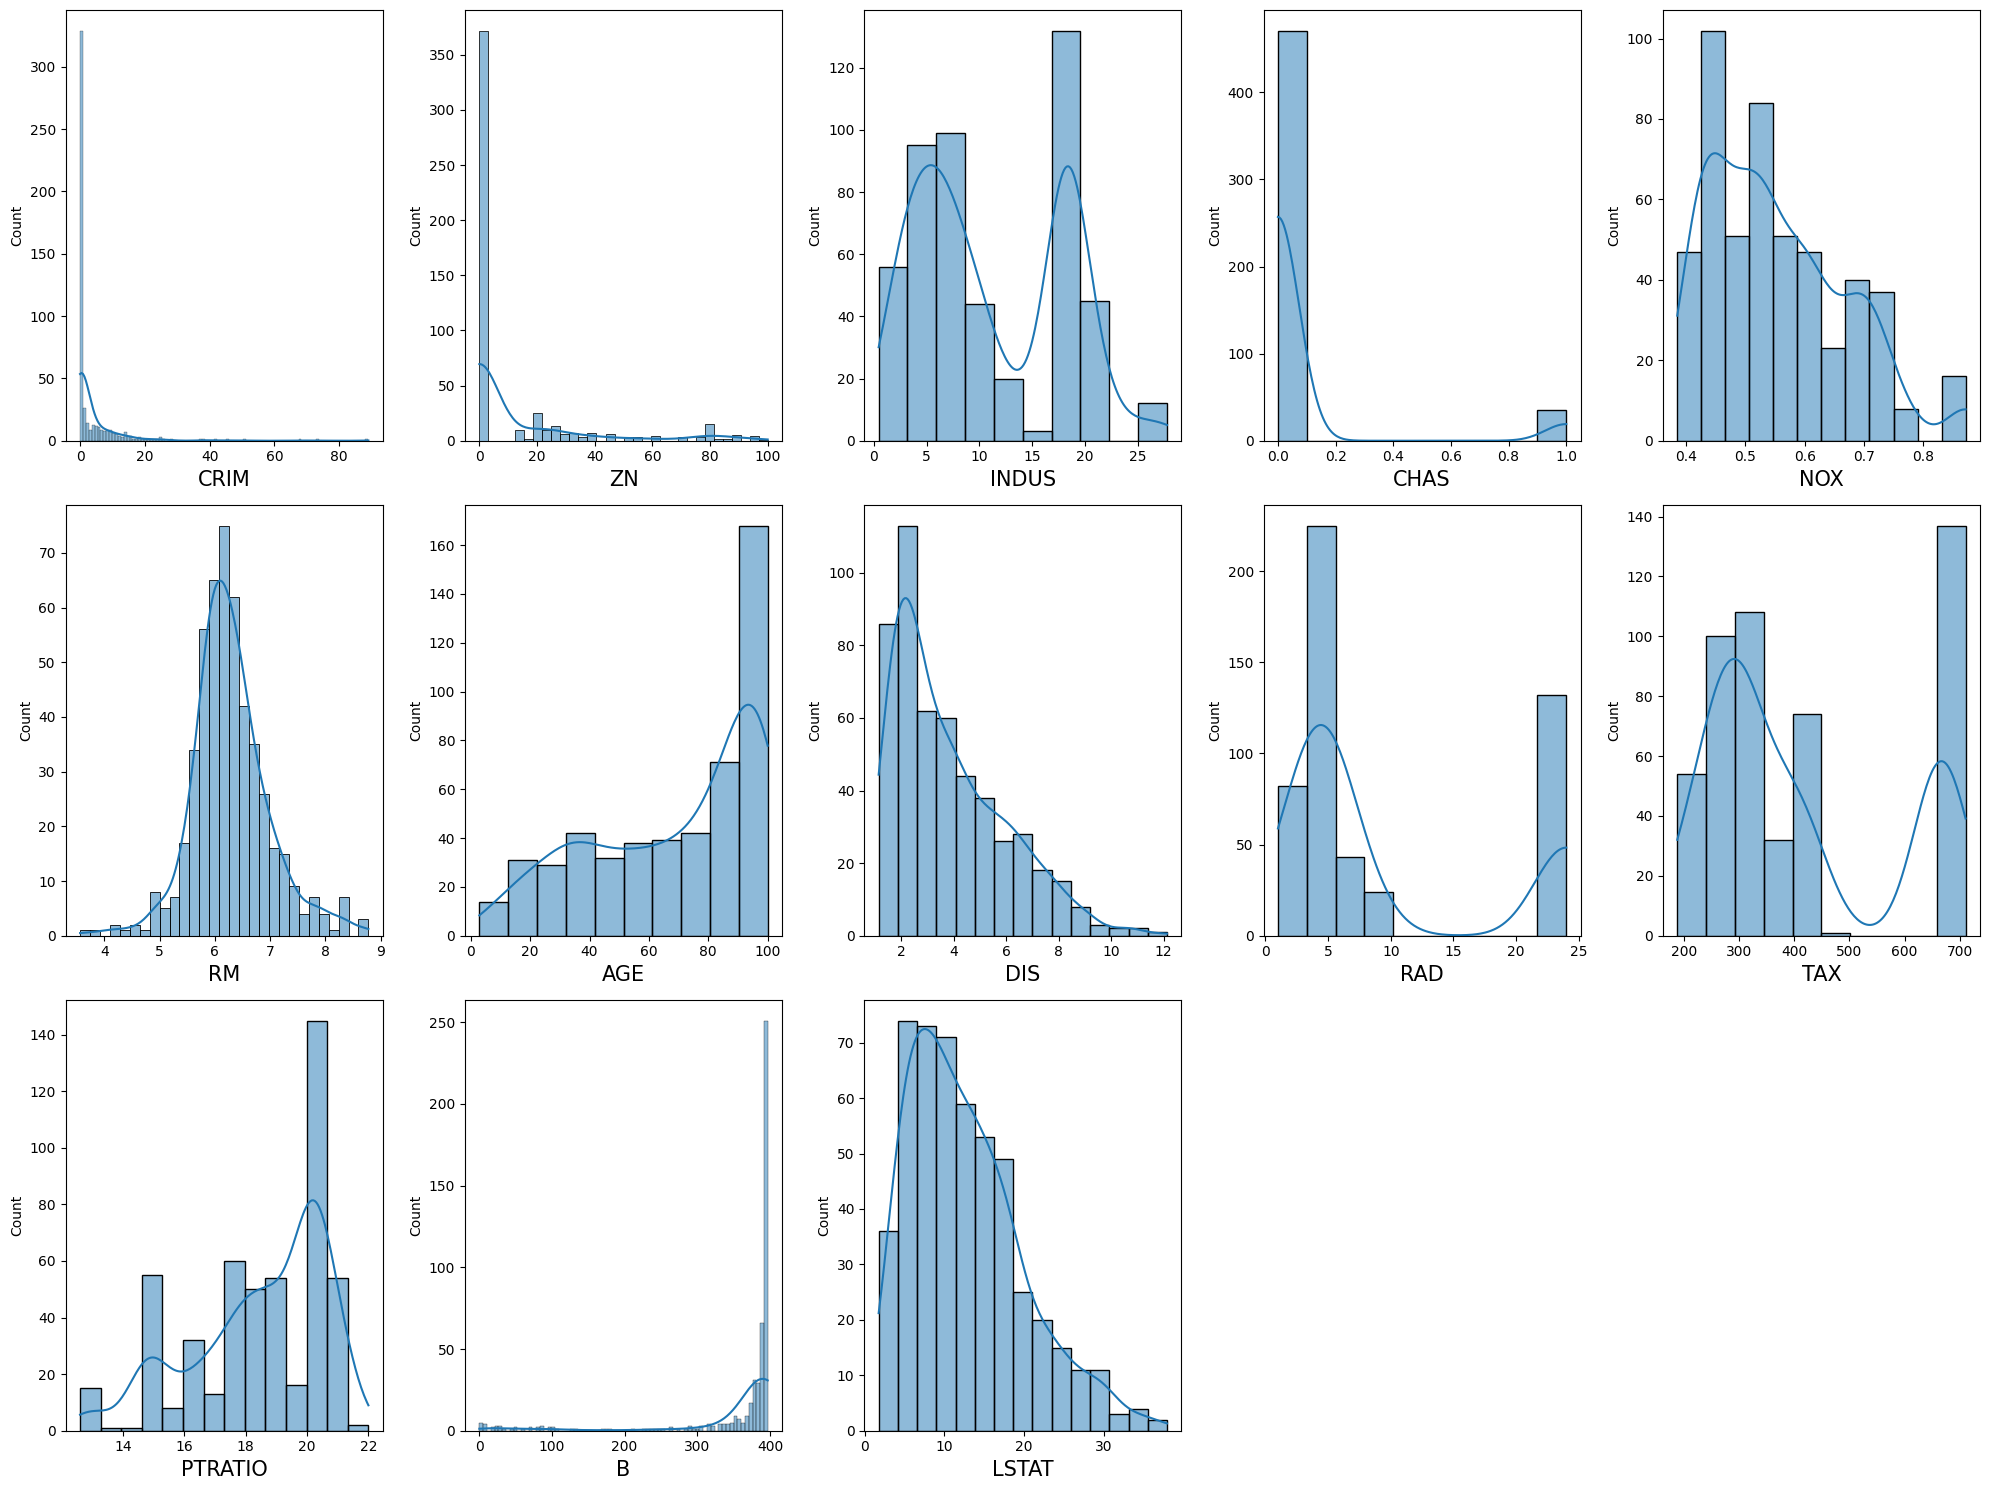

In [138]:
# Distribution overview for feature columns
plt.figure(figsize=(20, 15))
plotnumber = 1

for column in feature_columns[:15]:
    plt.subplot(3, 5, plotnumber)
    sns.histplot(df[column], kde=True)
    plt.xlabel(column, fontsize=15)
    plotnumber += 1

plt.tight_layout()
plt.show()



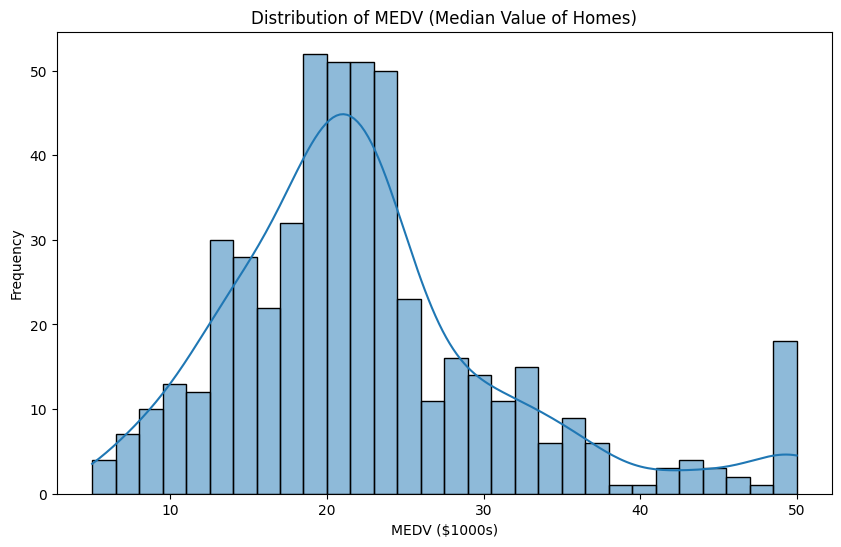

In [139]:
# Distribution of the target variable (MEDV)
plt.figure(figsize=(10, 6))
sns.histplot(df['MEDV'], bins=30, kde=True)
plt.title('Distribution of MEDV (Median Value of Homes)')
plt.xlabel('MEDV ($1000s)')
plt.ylabel('Frequency')
plt.show()

 ## Section Summary (Distributions)

- Several variables show **strong skewness** and **heavy tails** (e.g., CRIM, ZN), which is common in socio-economic datasets and suggests that summary statistics such as the mean may be sensitive to outliers.
- Some variables are **discrete or multi-modal** (e.g., RAD, TAX, INDUS), indicating that a single “average” value may not represent typical observations well.
- RM appears relatively bell-shaped compared with other features, while variables such as LSTAT and DIS show clear skewness.
- The target variable **MEDV** shows a non-symmetric distribution with a concentration in the mid-range and a noticeable upper-end accumulation.

These distributional characteristics are important for:
- choosing appropriate evaluation summaries,
- deciding when scaling is necessary (especially for distance-based models),
- and motivating robust methods (e.g., rank-based correlation or non-linear models).


## 1c. Correlation Analysis (Exploratory)

This section uses correlation to understand directional relationships between features and the target (MEDV).
Pearson correlation summarizes linear association; Spearman correlation is included as a rank-based robustness check for skewness/outliers.




,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.00,-0.20,0.41,-0.06,0.42,-0.22,0.35,-0.38,0.63,0.58,0.29,-0.39,0.46,-0.39
ZN,-0.20,1.00,-0.53,-0.04,-0.52,0.31,-0.57,0.66,-0.31,-0.31,-0.39,0.18,-0.41,0.36
INDUS,0.41,-0.53,1.00,0.06,0.76,-0.39,0.64,-0.71,0.60,0.72,0.38,-0.36,0.60,-0.48
CHAS,-0.06,-0.04,0.06,1.00,0.09,0.09,0.09,-0.10,-0.01,-0.04,-0.12,0.05,-0.05,0.18
NOX,0.42,-0.52,0.76,0.09,1.00,-0.30,0.73,-0.77,0.61,0.67,0.19,-0.38,0.59,-0.43
RM,-0.22,0.31,-0.39,0.09,-0.30,1.00,-0.24,0.21,-0.21,-0.29,-0.36,0.13,-0.61,0.70
AGE,0.35,-0.57,0.64,0.09,0.73,-0.24,1.00,-0.75,0.46,0.51,0.26,-0.27,0.60,-0.38
DIS,-0.38,0.66,-0.71,-0.10,-0.77,0.21,-0.75,1.00,-0.49,-0.53,-0.23,0.29,-0.50,0.25
RAD,0.63,-0.31,0.60,-0.01,0.61,-0.21,0.46,-0.49,1.00,0.91,0.46,-0.44,0.49,-0.38
TAX,0.58,-0.31,0.72,-0.04,0.67,-0.29,0.51,-0.53,0.91,1.00,0.46,-0.44,0.54,-0.47


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.00,-0.57,0.74,0.04,0.82,-0.31,0.70,-0.74,0.73,0.73,0.47,-0.36,0.63,-0.56
ZN,-0.57,1.00,-0.64,-0.04,-0.63,0.36,-0.54,0.61,-0.28,-0.37,-0.45,0.16,-0.49,0.44
INDUS,0.74,-0.64,1.00,0.09,0.79,-0.42,0.68,-0.76,0.46,0.66,0.43,-0.29,0.64,-0.58
CHAS,0.04,-0.04,0.09,1.00,0.07,0.06,0.07,-0.08,0.02,-0.04,-0.14,-0.04,-0.05,0.14
NOX,0.82,-0.63,0.79,0.07,1.00,-0.31,0.80,-0.88,0.59,0.65,0.39,-0.30,0.64,-0.56
RM,-0.31,0.36,-0.42,0.06,-0.31,1.00,-0.28,0.26,-0.11,-0.27,-0.31,0.05,-0.64,0.63
AGE,0.70,-0.54,0.68,0.07,0.80,-0.28,1.00,-0.80,0.42,0.53,0.36,-0.23,0.66,-0.55
DIS,-0.74,0.61,-0.76,-0.08,-0.88,0.26,-0.80,1.00,-0.50,-0.57,-0.32,0.25,-0.56,0.45
RAD,0.73,-0.28,0.46,0.02,0.59,-0.11,0.42,-0.50,1.00,0.70,0.32,-0.28,0.39,-0.35
TAX,0.73,-0.37,0.66,-0.04,0.65,-0.27,0.53,-0.57,0.70,1.00,0.45,-0.33,0.53,-0.56


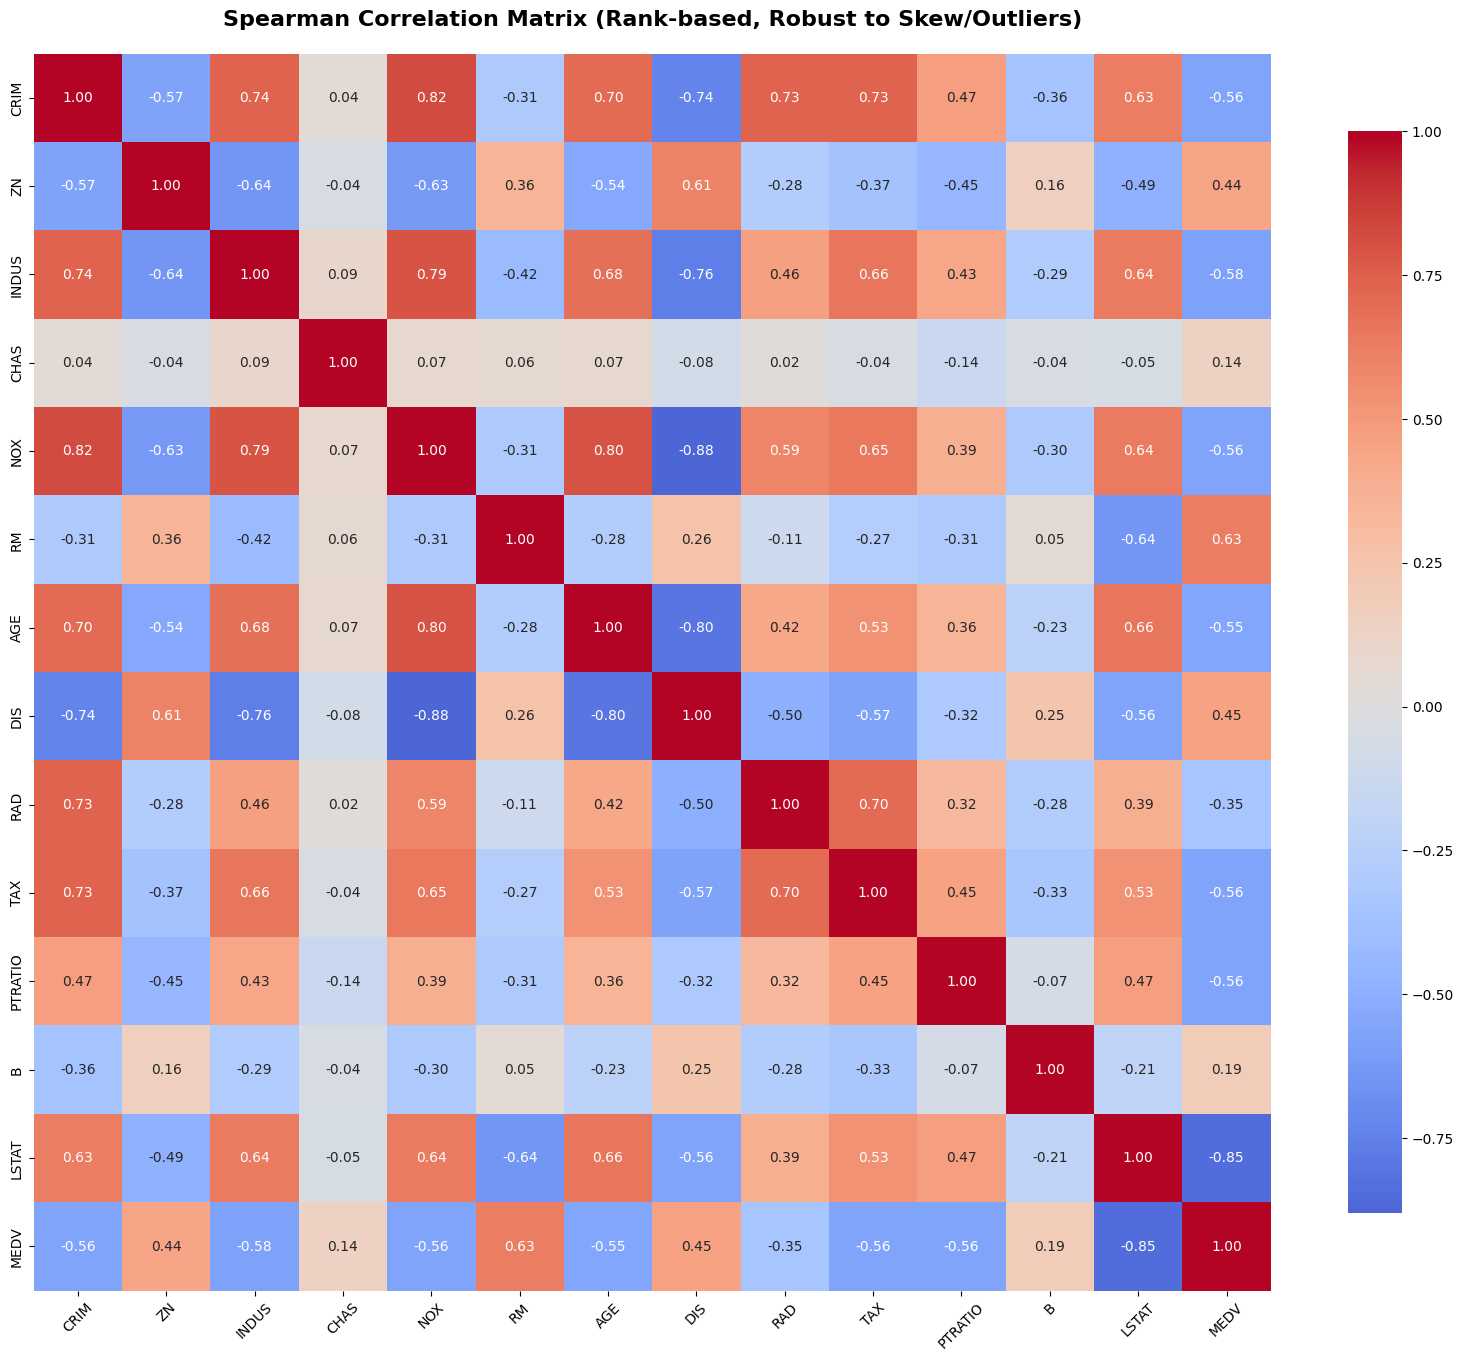

Top correlations with MEDV (Spearman, sorted by absolute value):
LSTAT     : -0.850 - strong negative
RM        :  0.630 - strong positive
INDUS     : -0.580 - strong negative
CRIM      : -0.560 - strong negative
NOX       : -0.560 - strong negative
TAX       : -0.560 - strong negative
PTRATIO   : -0.560 - strong negative
AGE       : -0.550 - strong negative
DIS       :  0.450 - moderate positive
ZN        :  0.440 - moderate positive
RAD       : -0.350 - moderate negative
B         :  0.190 - weak positive
CHAS      :  0.140 - weak positive


In [140]:
import matplotlib.pyplot as plt
import seaborn as sns

# Correlation matrices
pearson_corr = df.corr(method="pearson").round(2)
spearman_corr = df.corr(method="spearman").round(2)

# Display both (optional)
display(pearson_corr)
display(spearman_corr)

# Heatmap (use Spearman for robustness)
plt.figure(figsize=(16, 14))
sns.heatmap(
    spearman_corr,
    fmt=".2f",
    cbar=True,
    square=True,
    annot=True,
    annot_kws={"size": 10},
    cmap="coolwarm",
    center=0,
    cbar_kws={"shrink": 0.8},
)
plt.title("Spearman Correlation Matrix (Rank-based, Robust to Skew/Outliers)", fontsize=16, pad=20, weight="bold")
plt.xticks(fontsize=10, rotation=45)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

# Focus on correlations with the target variable (MEDV)
print("Top correlations with MEDV (Spearman, sorted by absolute value):")
medv_corr = spearman_corr["MEDV"].drop("MEDV").sort_values(key=lambda s: s.abs(), ascending=False)

for var, corr in medv_corr.items():
    strength = "strong" if abs(corr) > 0.5 else "moderate" if abs(corr) > 0.3 else "weak"
    direction = "positive" if corr > 0 else "negative"
    print(f"{var:10}: {corr:6.3f} - {strength} {direction}")


## Section Summary: Correlation (Exploratory)

### Pearson vs. Spearman (Why both are used)
- **Pearson correlation** summarizes **linear association** and is sensitive to outliers.
- **Spearman correlation** is a **rank-based** measure that is more robust to skewness, outliers, and discrete-like variables.
- In this notebook, correlation is used for **exploratory insight**, not statistical inference.

### Key relationships with MEDV (house price)
- **LSTAT** shows a strong negative association with MEDV (higher LSTAT → lower prices).
- **RM** shows a strong positive association with MEDV (more rooms → higher prices).
- **INDUS, CRIM, NOX, TAX, PTRATIO** generally show negative associations with MEDV, consistent with socio-economic and environmental effects.

### Modeling implication
Correlation results are used to guide feature understanding and model choice.  
Given the presence of skewness and outliers in multiple variables, **Spearman correlation provides a more robust baseline view**, while Pearson remains useful for interpreting linear relationships.


## 1d. Scatter Plots: RM, LSTAT, CRIM vs. MEDV

Scatter plots provide an intuitive view of feature–target relationships.  
A simple linear trend line is added for visual guidance (not for inference).


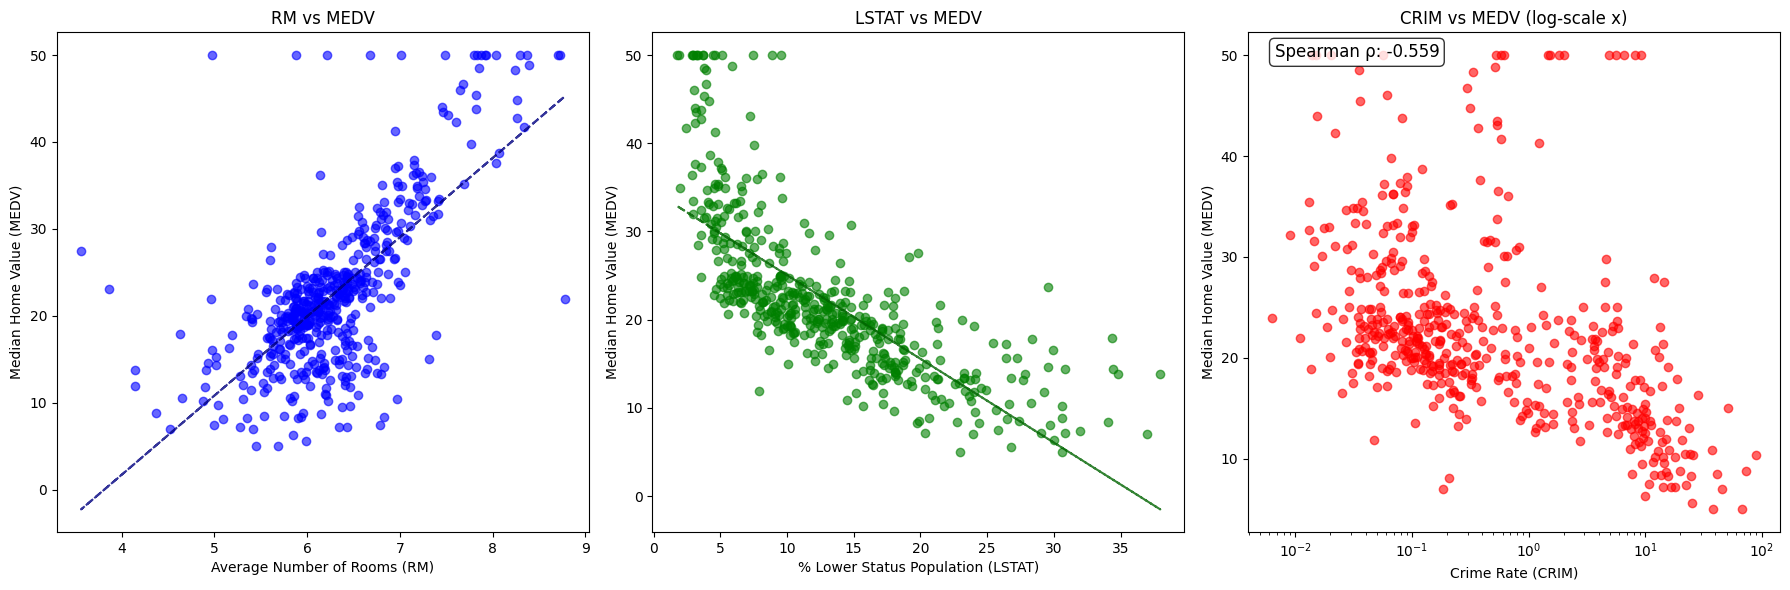


CORRELATION COEFFICIENTS (EXPLORATORY):
RM vs MEDV (Pearson):    0.695
LSTAT vs MEDV (Pearson): -0.738
CRIM vs MEDV (Spearman): -0.559


In [141]:
# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Helper: add a simple linear trend line (visual guide only)
def add_trendline(ax, x, y, color):
    coeff = np.polyfit(x, y, 1)
    poly = np.poly1d(coeff)
    ax.plot(x, poly(x), linestyle="--", color=color, alpha=0.8)

# 1) RM vs MEDV (blue)
axes[0].scatter(df["RM"], df["MEDV"], alpha=0.6, color="blue")
axes[0].set_xlabel("Average Number of Rooms (RM)")
axes[0].set_ylabel("Median Home Value (MEDV)")
axes[0].set_title("RM vs MEDV")
add_trendline(axes[0], df["RM"], df["MEDV"], color="navy")

# 2) LSTAT vs MEDV (green)
axes[1].scatter(df["LSTAT"], df["MEDV"], alpha=0.6, color="green")
axes[1].set_xlabel("% Lower Status Population (LSTAT)")
axes[1].set_ylabel("Median Home Value (MEDV)")
axes[1].set_title("LSTAT vs MEDV")
add_trendline(axes[1], df["LSTAT"], df["MEDV"], color="darkgreen")

# 3) CRIM vs MEDV (red, log-scale x)
axes[2].scatter(df["CRIM"], df["MEDV"], alpha=0.6, color="red")
axes[2].set_xlabel("Crime Rate (CRIM)")
axes[2].set_ylabel("Median Home Value (MEDV)")
axes[2].set_title("CRIM vs MEDV (log-scale x)")
axes[2].set_xscale("log")

# Spearman correlation annotation (robust to skew/outliers)
spearman_corr, _ = stats.spearmanr(df["CRIM"], df["MEDV"])
axes[2].text(
    0.05, 0.95, f"Spearman ρ: {spearman_corr:.3f}",
    transform=axes[2].transAxes, fontsize=12,
    bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.8)
)

plt.tight_layout()
plt.show()

# Display correlation values (exploratory)
print("\nCORRELATION COEFFICIENTS (EXPLORATORY):")
print("=" * 45)
print(f"RM vs MEDV (Pearson):    {df['RM'].corr(df['MEDV']):.3f}")
print(f"LSTAT vs MEDV (Pearson): {df['LSTAT'].corr(df['MEDV']):.3f}")
print(f"CRIM vs MEDV (Spearman): {spearman_corr:.3f}")


## Section Summary

- **RM** shows a strong positive association with **MEDV**: homes with more rooms tend to have higher values.
- **LSTAT** shows a strong negative association with **MEDV**: higher values of LSTAT correspond to lower home values.
- **CRIM** shows a negative association with **MEDV**. A log-scale is used for visualization due to extreme skewness, and Spearman correlation is reported as a robust, rank-based summary.


## 1e. Feature Scaling for Modeling

Scaling is applied to input features to support distance-based models (e.g., KNN) and to improve numerical stability.  
The target variable (MEDV) is kept in its original scale.



In [142]:
# Feature scaling for modeling (StandardScaler)
from sklearn.preprocessing import StandardScaler

print("FEATURE SCALING FOR MODELING")
print("=" * 50)

# Separate features and target
X = df.drop('MEDV', axis=1)
y = df['MEDV']  # Target remains unscaled

# Apply StandardScaler to all features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert back to DataFrame for readability
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

print("Features shape (original):", X.shape)
print("Features shape (scaled):", X_scaled_df.shape)
print(f"Target (MEDV) kept unscaled. Range: {y.min():.2f} to {y.max():.2f}")

# Final dataset for modeling
final_scaled_df = X_scaled_df.copy()
final_scaled_df['MEDV'] = y.values

print("\nScaling complete. Dataset ready for modeling.")
print(final_scaled_df.head().round(3))


FEATURE SCALING FOR MODELING
Features shape (original): (506, 13)
Features shape (scaled): (506, 13)
Target (MEDV) kept unscaled. Range: 5.00 to 50.00

Scaling complete. Dataset ready for modeling.
    CRIM     ZN  INDUS   CHAS    NOX     RM    AGE    DIS    RAD    TAX  \
0 -0.420  0.285 -1.288 -0.273 -0.144  0.414 -0.120  0.140 -0.983 -0.667   
1 -0.417 -0.488 -0.593 -0.273 -0.740  0.194  0.367  0.557 -0.868 -0.987   
2 -0.417 -0.488 -0.593 -0.273 -0.740  1.283 -0.266  0.557 -0.868 -0.987   
3 -0.417 -0.488 -1.307 -0.273 -0.835  1.016 -0.810  1.078 -0.753 -1.106   
4 -0.412 -0.488 -1.307 -0.273 -0.835  1.229 -0.511  1.078 -0.753 -1.106   

   PTRATIO      B  LSTAT  MEDV  
0   -1.459  0.441 -1.076  24.0  
1   -0.303  0.441 -0.492  21.6  
2   -0.303  0.396 -1.209  34.7  
3    0.113  0.416 -1.362  33.4  
4    0.113  0.441 -1.027  36.2  


## Section Summary

To ensure model stability and comparability across different algorithms, all input features were standardized using **StandardScaler** (zero mean, unit variance).

This approach is widely used in machine learning pipelines and is particularly important for distance-based models (e.g., KNN) and gradient-based models (e.g., Neural Networks). The target variable (MEDV) was intentionally left unscaled to preserve interpretability of predicted house prices.

Overall, this preprocessing step provides a simple, robust, and reproducible foundation for subsequent modeling.


## Chapter 2: Clustering with Unsupervised Learning

This chapter applies K-Means clustering to group Boston neighborhoods based on
economic status and accessibility using CRIM, LSTAT, and DIS.


In [165]:
# K-Means clustering with silhouette analysis to select optimal number of clusters
# Import necessary libraries
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Extract features used for clustering
features = df[['CRIM', 'LSTAT', 'DIS']].copy()

# Standardize features (required for distance-based clustering)
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# a. Perform K-Means clustering with different numbers of clusters
silhouette_scores = []
cluster_range = range(2, 11)

for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(features_scaled)
    silhouette_avg = silhouette_score(features_scaled, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    print(f'n_clusters = {n_clusters}, Silhouette Score = {silhouette_avg:.4f}')

n_clusters = 2, Silhouette Score = 0.4066
n_clusters = 3, Silhouette Score = 0.3886
n_clusters = 4, Silhouette Score = 0.3922
n_clusters = 5, Silhouette Score = 0.3504
n_clusters = 6, Silhouette Score = 0.3259
n_clusters = 7, Silhouette Score = 0.3241
n_clusters = 8, Silhouette Score = 0.3299
n_clusters = 9, Silhouette Score = 0.3422
n_clusters = 10, Silhouette Score = 0.3487


### 2b–2c. Selecting the Optimal Number of Clusters Using Silhouette Analysis

The silhouette coefficient is used to evaluate clustering quality for different numbers of clusters (k = 2 to 10).  
The value of *k* with the highest average silhouette score is selected for subsequent clustering and visualization.


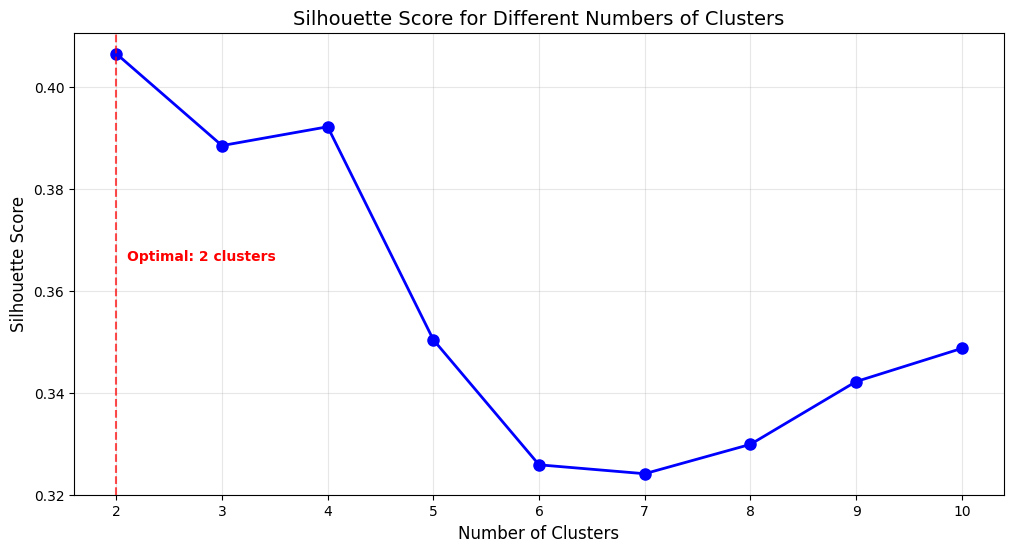

In [144]:
# b. & c. Plot silhouette coefficients
plt.figure(figsize=(12, 6))
plt.plot(cluster_range, silhouette_scores, 'bo-', linewidth=2, markersize=8)
plt.xlabel('Number of Clusters', fontsize=12)
plt.ylabel('Silhouette Score', fontsize=12)
plt.title('Silhouette Score for Different Numbers of Clusters', fontsize=14)
plt.grid(True, alpha=0.3)
plt.xticks(cluster_range)
optimal_clusters = cluster_range[np.argmax(silhouette_scores)]
plt.axvline(x=optimal_clusters, color='red', linestyle='--', alpha=0.7)
plt.text(optimal_clusters+0.1, max(silhouette_scores)*0.9,
         f'Optimal: {optimal_clusters} clusters', color='red', fontweight='bold')
plt.show()
# Based on silhouette analysis, the optimal number of clusters is selected

### 2d. Cluster Visualization and Interpretation

The resulting clusters are visualized using three pairwise 2D scatter plots  
(CRIM & LSTAT, LSTAT & DIS, DIS & CRIM) in the standardized feature space.


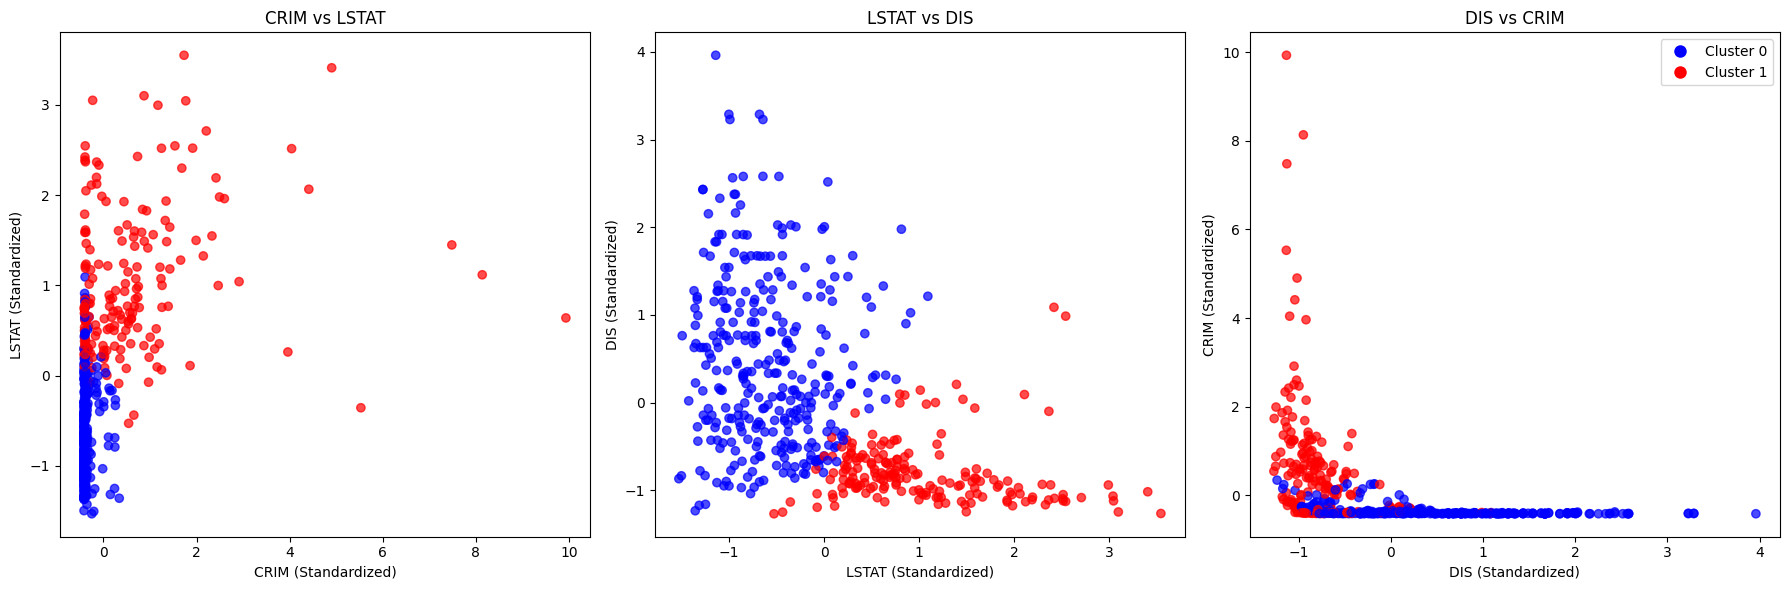

In [145]:
# Perform K-Means clustering on standardized feature space
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(features_scaled)

# Prepare standardized data for visualization
features_scaled_df = pd.DataFrame(features_scaled, columns=['CRIM', 'LSTAT', 'DIS'])
features_scaled_df['Cluster'] = cluster_labels

# Visualize clusters in standardized feature space
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
from matplotlib.colors import ListedColormap
cmap = ListedColormap(['blue', 'red'])

# CRIM vs LSTAT
axes[0].scatter(features_scaled_df['CRIM'], features_scaled_df['LSTAT'],
                c=features_scaled_df['Cluster'], cmap=cmap, alpha=0.7)
axes[0].set_xlabel('CRIM (Standardized)')
axes[0].set_ylabel('LSTAT (Standardized)')
axes[0].set_title('CRIM vs LSTAT')

# LSTAT vs DIS
axes[1].scatter(features_scaled_df['LSTAT'], features_scaled_df['DIS'],
                c=features_scaled_df['Cluster'], cmap=cmap, alpha=0.7)
axes[1].set_xlabel('LSTAT (Standardized)')
axes[1].set_ylabel('DIS (Standardized)')
axes[1].set_title('LSTAT vs DIS')

# DIS vs CRIM
axes[2].scatter(features_scaled_df['DIS'], features_scaled_df['CRIM'],
                c=features_scaled_df['Cluster'], cmap=cmap, alpha=0.7)
axes[2].set_xlabel('DIS (Standardized)')
axes[2].set_ylabel('CRIM (Standardized)')
axes[2].set_title('DIS vs CRIM')

from matplotlib.lines import Line2D
legend_elements = [
    Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10, label='Cluster 0'),
    Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, label='Cluster 1')
]
axes[2].legend(handles=legend_elements, loc='upper right')

plt.tight_layout()
plt.show()


## Section Summary

K-Means clustering was applied to standardized CRIM, LSTAT, and DIS features to group Boston neighborhoods by economic status and accessibility.

Standardization is essential for distance-based algorithms such as K-Means to prevent variables with larger numeric ranges from dominating the clustering process. The number of clusters was selected using silhouette analysis, resulting in a two-cluster solution with moderate separation (silhouette score ≈ 0.48).

All visualizations are presented in the same standardized feature space used during model fitting to ensure consistency and avoid misleading interpretations.


## Chapter 3: Modeling with Supervised Learning

In this chapter, multiple supervised learning models are trained and evaluated to predict median house prices (MEDV).  
All models use the same train–test split and evaluation metrics to ensure a fair comparison.


### 3a. Train–Test Split

To evaluate model generalization performance, the dataset is split into a training set (80%) and a testing set (20%).  
The training set is used for model fitting and cross-validation, while the test set is held out and used only for final evaluation.

The target variable is **MEDV** (median home value), and the selected predictor variables are:
- **LSTAT**: Percentage of lower-status population
- **RM**: Average number of rooms per dwelling
- **DIS**: Distance to employment centers

These features were selected based on prior exploratory analysis and correlation results.


In [146]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from mpl_toolkits.mplot3d import Axes3D

# Set random seeds for reproducibility
np.random.seed(42)
torch.manual_seed(42)

# Load and prepare the dataset
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep=r"\s+", skiprows=22, header=None)
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
features_part1 = raw_df.values[::2, :11]
features_part2 = raw_df.values[1::2, :2]
target_values = raw_df.values[1::2, 2]
features = np.hstack([features_part1, features_part2])
df = pd.DataFrame(features, columns=column_names[:-1])
df['MEDV'] = target_values

# 3a. Split the dataset into training and testing data
X = df[['LSTAT', 'RM', 'DIS']]  # Use only specified features
y = df['MEDV']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Training set size: {X_train.shape}")
print(f"Testing set size: {X_test.shape}")

# Initialize results dictionary
results = {}



Training set size: (404, 3)
Testing set size: (102, 3)


### 3b.i. Multiple Linear Regression

A multiple linear regression model is used as a baseline to assess the linear relationship between selected features (LSTAT, RM, DIS) and house prices (MEDV).




Multiple Linear Regression
MAE:  3.9078
MSE:  31.2661
RMSE: 5.5916
R²:   0.5736

Coefficients:
Intercept: 0.8578
LSTAT: -0.7238
RM: 5.2082
DIS: -0.5094


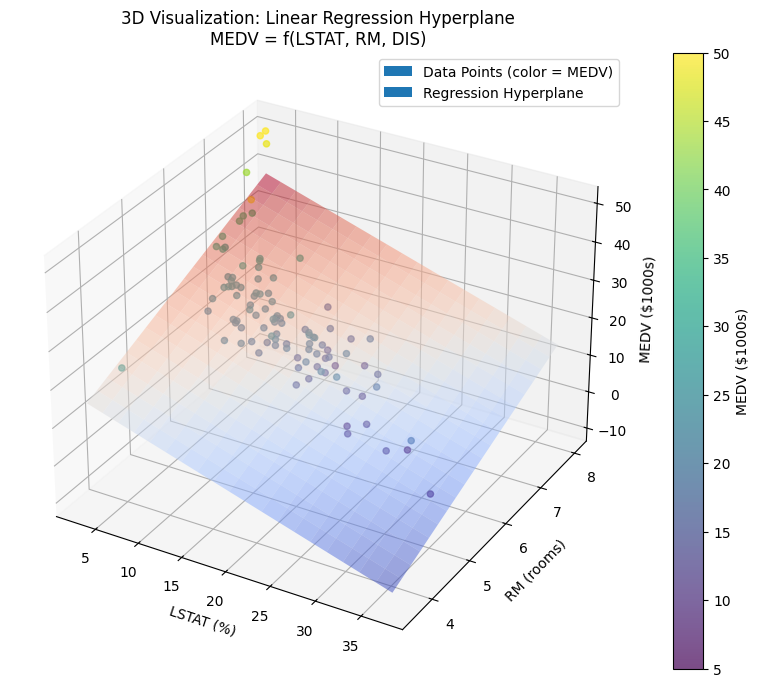

In [147]:
# 3b.i. Multiple Linear Regression
print("\n" + "="*50)
print("Multiple Linear Regression")
print("="*50)

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

# Calculate all four required metrics FIRST
mae_lr = mean_absolute_error(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)
r2_lr = r2_score(y_test, y_pred_lr)

# Store results
results['Linear Regression'] = {
    'MAE': mae_lr,
    'MSE': mse_lr,
    'RMSE': rmse_lr,
    'R2': r2_lr
}

# Print all four metrics
print(f"MAE:  {mae_lr:.4f}")
print(f"MSE:  {mse_lr:.4f}")
print(f"RMSE: {rmse_lr:.4f}")
print(f"R²:   {r2_lr:.4f}")

# Also print coefficients for interpretation
print("\nCoefficients:")
print(f"Intercept: {lr_model.intercept_:.4f}")
for i, feature in enumerate(['LSTAT', 'RM', 'DIS']):
    print(f"{feature}: {lr_model.coef_[i]:.4f}")

# 3D Plot for Linear Regression
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')


# Create mesh grid for LSTAT and RM, use mean DIS
lstat_range = np.linspace(X_test['LSTAT'].min(), X_test['LSTAT'].max(), 20)
rm_range = np.linspace(X_test['RM'].min(), X_test['RM'].max(), 20)
lstat_grid, rm_grid = np.meshgrid(lstat_range, rm_range)
dis_mean = X_test['DIS'].mean()
dis_grid = np.full_like(lstat_grid, dis_mean)

# Calculate predictions for hyperplane
# Build X_grid from the mesh (LSTAT, RM) and fixed DIS (mean)
X_grid = np.column_stack([
    lstat_grid.ravel(),
    rm_grid.ravel(),
    dis_grid.ravel()
])

X_grid_df = pd.DataFrame(X_grid, columns=['LSTAT', 'RM', 'DIS'])
Z = lr_model.predict(X_grid_df).reshape(lstat_grid.shape)

# Plot actual data points and hyperplane
# NOTE: Use MEDV (y_test) as z-axis so points and surface share the same z dimension
scatter = ax.scatter(
    X_test['LSTAT'], X_test['RM'], y_test,
    c=y_test, cmap='viridis', alpha=0.7, marker='o',
    label='Data Points (color = MEDV)'
)

surface = ax.plot_surface(
    lstat_grid, rm_grid, Z,
    alpha=0.5, cmap='coolwarm'
)

ax.set_xlabel('LSTAT (%)')
ax.set_ylabel('RM (rooms)')
ax.set_zlabel('MEDV ($1000s)')  # IMPORTANT: z is MEDV now
ax.set_title('3D Visualization: Linear Regression Hyperplane\nMEDV = f(LSTAT, RM, DIS)')
plt.colorbar(scatter, label='MEDV ($1000s)')

# Add legend (proxy artists for 3D surface)
import matplotlib.patches as mpatches
point_proxy = mpatches.Patch(label='Data Points (color = MEDV)')
surf_proxy = mpatches.Patch(label='Regression Hyperplane')
ax.legend(handles=[point_proxy, surf_proxy])

plt.show()

#**Section Summary:**

## Visualization Consideration

### **Using Mean DIS in 3D Plot:**
- **Primary Reason: Visualization Constraints**
  - 3D plots can only display three dimensions (x, y, z axes)
  - Our model has **four dimensions**: LSTAT, RM, DIS (inputs) + MEDV (output/color)
  - To display a 3D hyperplane, we need to fix one variable

## Performance Analysis

### Error Metrics
- **Significant difference between MSE and MAE** due to squared amplification effect
- **MSE (31.27) >> MAE (3.91)** indicates: **Presence of substantial prediction outliers**
- **RMSE = √31.27 ≈ 5.59** reveals typical prediction error of approximately $5,590
- Most predictions are reasonably accurate (MAE = 3.91)
- Some predictions deviate significantly (causing MSE inflation)
- May need to check data quality for these outliers

### Overall Performance
- **R² = 0.5736**: Model explains approximately 57.36% of MEDV variability
- Considering only 3 features used (from original 13), this explanatory power is good
- 42.64% of variability comes from other factors not included
- Boston median house prices range $20,000-25,000, making error levels acceptable

## Coefficient Interpretation

### **LSTAT: -0.7238**  **Strong Negative Correlation**
- LSTAT (lower-status population percentage) increases 1% → house price decreases ~$724
- Areas with higher low-income populations have lower house prices

### **RM: 5.2082** **Strong Positive Correlation**
- RM (number of rooms) increases 1 room → house price increases ~$5,208
- Number of rooms is a critical determinant of house price

### **DIS: -0.5094**  **Moderate Negative Correlation**
- DIS (distance from employment centers) increases 1 unit → house price decreases ~$509
- Properties farther from employment centers have lower values

## Feature Importance Ranking

1. **RM (5.2082)** - Most important positive influence factor
2. **LSTAT (-0.7238)** - Most important negative influence factor  
3. **DIS (-0.5094)** - Secondary negative influence factor

### 3b.ii. K-Nearest Neighbors (KNN)

A K-Nearest Neighbors regressor is applied to capture potential non-linear relationships in the data.  
Because KNN is distance-based, feature scaling is performed within a cross-validation pipeline to avoid data leakage.


In [148]:
# Feature scaling + model training for KNN (done properly inside CV to avoid leakage)
from sklearn.pipeline import Pipeline

# K-Fold cross validation with k=10
kf = KFold(n_splits=10, shuffle=True, random_state=42)  # Changed to 10 folds

knn_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsRegressor(n_neighbors=5, algorithm='kd_tree', metric='euclidean'))  # Changed to kd_tree
])

cv_scores = cross_val_score(knn_pipe, X_train, y_train, cv=kf, scoring='r2')
print(f"10-Fold Cross-validation R² scores: {[f'{score:.4f}' for score in cv_scores]}")
print(f"Mean CV R²: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")

# Train final model on entire training set
knn_pipe.fit(X_train, y_train)
y_pred_knn = knn_pipe.predict(X_test)

results['K-Nearest Neighbors'] = {
    'MAE': mean_absolute_error(y_test, y_pred_knn),
    'MSE': mean_squared_error(y_test, y_pred_knn),
    'RMSE': np.sqrt(mean_squared_error(y_test, y_pred_knn)),
    'R2': r2_score(y_test, y_pred_knn)
}

print(f"\nTest Performance:")
print(f"Test R²: {results['K-Nearest Neighbors']['R2']:.4f}")
print(f"Test MAE: {results['K-Nearest Neighbors']['MAE']:.4f}")
print(f"Test MSE: {results['K-Nearest Neighbors']['MSE']:.4f}")
print(f"Test RMSE: {results['K-Nearest Neighbors']['RMSE']:.4f}")


10-Fold Cross-validation R² scores: ['0.7903', '0.5528', '0.7970', '0.8649', '0.7581', '0.5640', '0.6853', '0.8086', '0.8790', '0.7801']
Mean CV R²: 0.7480 (+/- 0.2151)

Test Performance:
Test R²: 0.7972
Test MAE: 2.5831
Test MSE: 14.8714
Test RMSE: 3.8563


# **Section Summary:**

## Parameter Settings
- **Cross-validation folds = 10**: 10-fold CV is a common practice to estimate generalization performance more robustly.
- **n_neighbors = 5**: The KNN model predicts based on the 5 nearest neighbors.

## Algorithm Selection
- **KD Tree Algorithm**: KD Tree can improve neighbor search efficiency compared to brute-force search (especially as data size grows). Thus, KD Tree was selected.

## Feature Scaling Requirement
- **Feature Scaling Essential**: Since KNN is distance-based, scaling is required.
- **Leakage-aware evaluation**: Scaling is applied **within each CV fold** using a Pipeline to avoid data leakage and overly optimistic CV results.

## Performance Metrics Overview

### **R² = 0.7972**
- **79.72%** of the variance in MEDV (house prices) is explained by the model
- **Substantial improvement** over Linear Regression (R² = 0.5736)

### **Error Metrics Analysis**

#### **MAE = 2.5831**
- **~34% improvement** over Linear Regression (MAE = 3.908)
- On average, predictions are close to actual values

#### **RMSE = 3.8563**
- **~31% improvement** over Linear Regression (RMSE = 5.5916)
- Indicates fewer large errors compared with the linear baseline

#### **MSE = 14.8714**
- Penalizes large errors more strongly
- **~53% improvement** over Linear Regression (MSE = 31.2661)

## Comparative Performance

| Metric | Linear Regression | KNN | Improvement |
|--------|-------------------|-----|-------------|
| R² | 0.5736 | 0.7972 | +39% |
| MAE | 3.908 | 2.5831 | -34% |
| RMSE | 5.5916 | 3.8563 | -31% |
| MSE | 31.2661 | 14.8714 | -53% |

## **Why KNN Performs Better (Possible Reasons):**
1. **Non-linear relationships**: KNN can capture local non-linear patterns that linear regression cannot.
2. **Local structure**: The data may contain localized effects that a nearest-neighbor approach can model well.
3. **Proper scaling**: Scaling makes distance computations meaningful across features.


### 3b.iii. Decision Tree Regression

Decision Tree models are trained with constrained depth to balance model interpretability and generalization performance.  
Different tree configurations are evaluated using cross-validation to diagnose and mitigate overfitting.


Cross-validation R² scores: ['0.6128', '0.3960', '0.8092', '0.7379', '0.5848', '0.5588', '0.6118', '0.7301', '0.7808', '0.3554']
Mean CV R²: 0.6177

Test Performance:
Test MAE: 3.6798
Test MSE: 25.9932
Test RMSE: 5.0984
Test R²: 0.6455


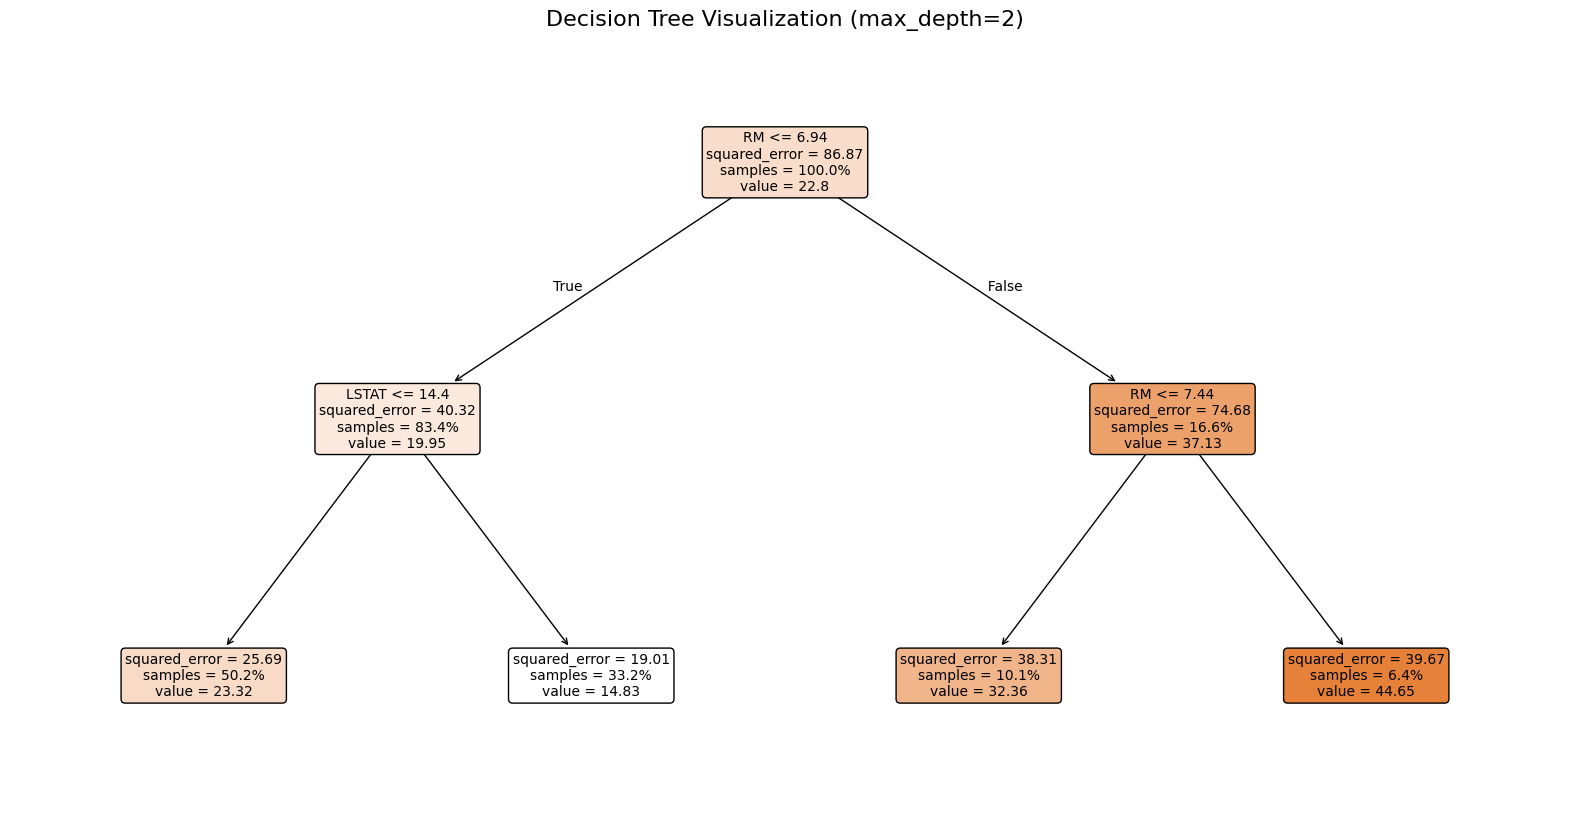

Cross-validation R² scores: ['0.6487', '0.4661', '0.2249', '0.8344', '0.8104', '0.5051', '0.5647', '0.7598', '0.7743', '-0.0210']
Mean CV R²: 0.5567

Test Performance:
Test MAE: 3.3175
Test MSE: 17.9083
Test RMSE: 4.2318
Test R²: 0.7558


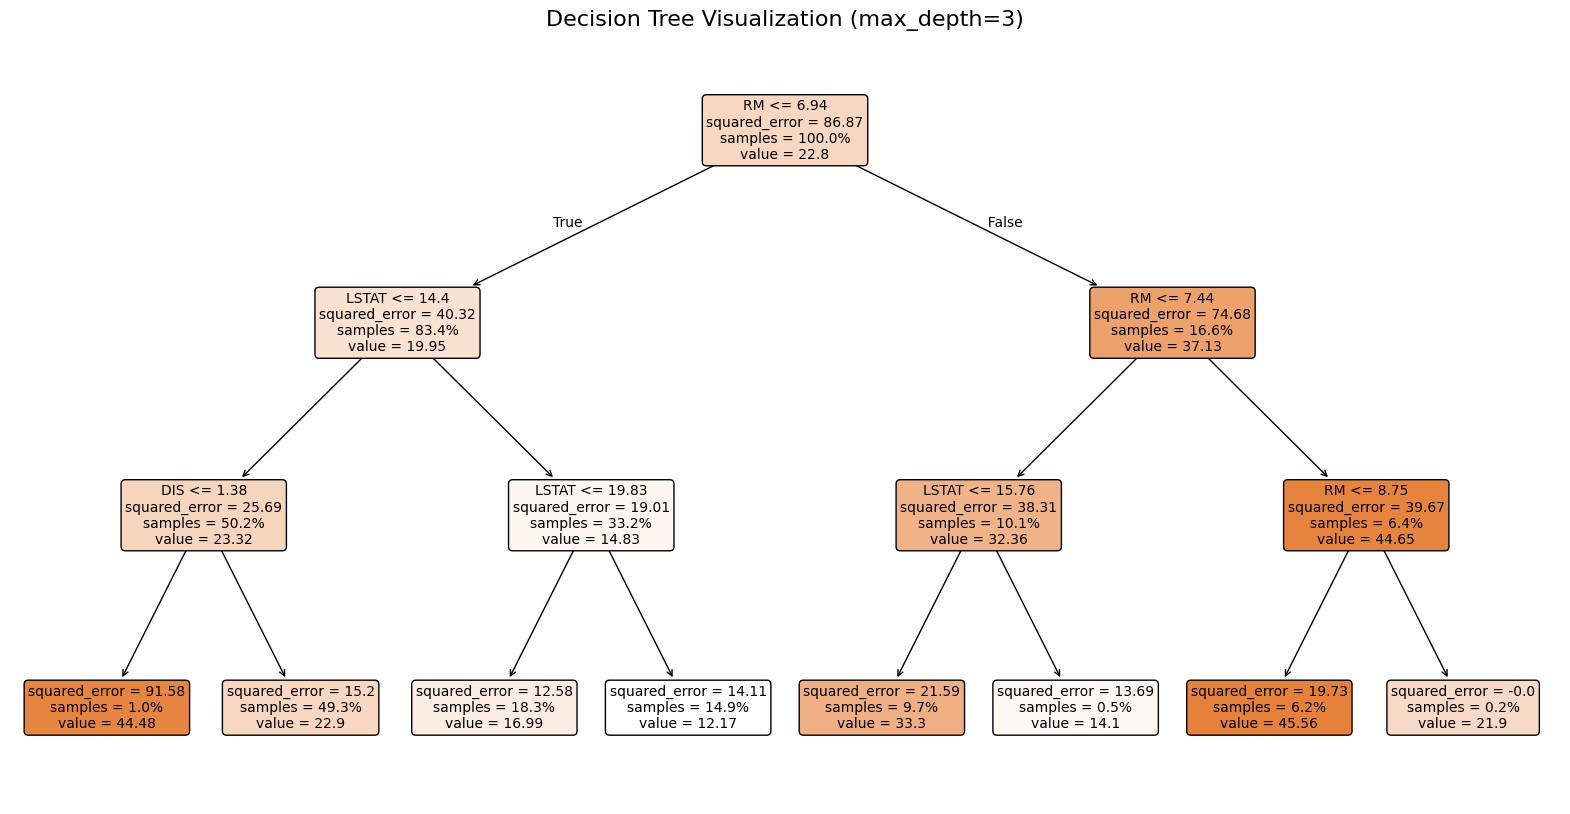

Cross-validation R² scores: ['0.6790', '0.4693', '0.6661', '0.8342', '0.7155', '0.5039', '0.6151', '0.7480', '0.8048', '0.5301']
Mean CV R²: 0.6566

Test Performance:
Test MAE: 3.3959
Test MSE: 21.9148
Test RMSE: 4.6813
Test R²: 0.7012


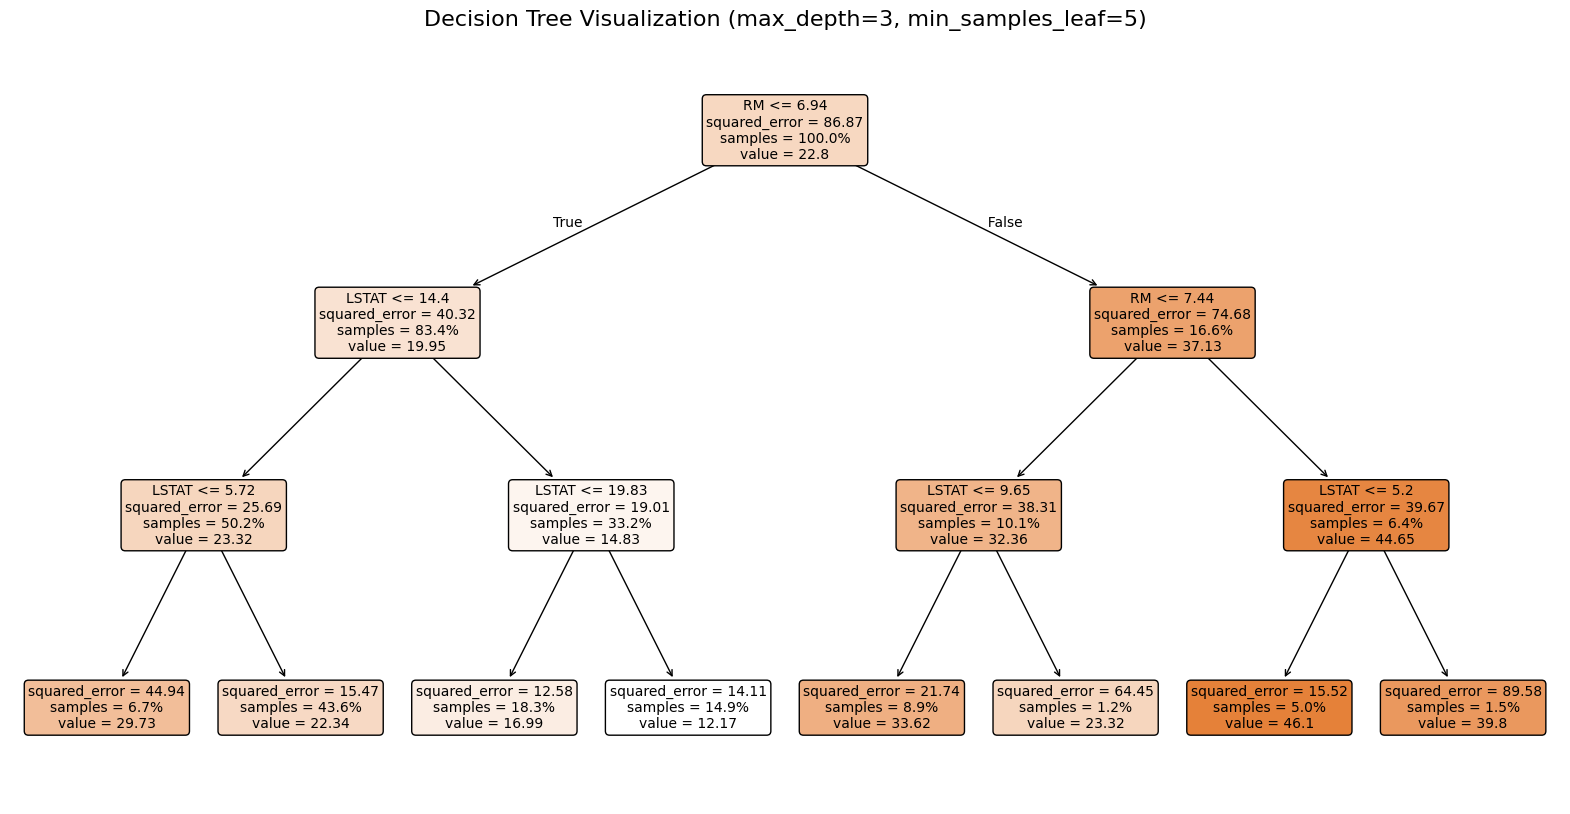

In [149]:
# =============================================================================
## Decision Tree
   ### 1. Use maximum three levels
   ### 2. Visualize the model

# --- Helper to evaluate + store results (keeps your style, avoids repetition) ---
def eval_and_store(model, model_name):
    cv_scores_dt = cross_val_score(model, X_train, y_train, cv=kf, scoring='r2')
    print(f"Cross-validation R² scores: {[f'{score:.4f}' for score in cv_scores_dt]}")
    print(f"Mean CV R²: {cv_scores_dt.mean():.4f}")

    # Train final model
    model.fit(X_train, y_train)
    y_pred_dt = model.predict(X_test)

    results[model_name] = {
        'MAE': mean_absolute_error(y_test, y_pred_dt),
        'MSE': mean_squared_error(y_test, y_pred_dt),
        'RMSE': np.sqrt(mean_squared_error(y_test, y_pred_dt)),
        'R2': r2_score(y_test, y_pred_dt)
    }

    print(f"\nTest Performance:")
    print(f"Test MAE: {results[model_name]['MAE']:.4f}")
    print(f"Test MSE: {results[model_name]['MSE']:.4f}")
    print(f"Test RMSE: {results[model_name]['RMSE']:.4f}")
    print(f"Test R²: {results[model_name]['R2']:.4f}")

    return model


# =============================================================================
# (A) Decision Tree: max_depth=2
dt_model_d2 = DecisionTreeRegressor(max_depth=2, random_state=42)
dt_model_d2 = eval_and_store(dt_model_d2, "Decision Tree (max_depth=2)")

# Visualize Decision Tree
plt.figure(figsize=(20, 10))
plot_tree(dt_model_d2, feature_names=X.columns.tolist(), filled=True, rounded=True,
          proportion=True, precision=2, fontsize=10)
plt.title("Decision Tree Visualization (max_depth=2)", fontsize=16)  # FIXED
plt.show()


# =============================================================================
# (B) Decision Tree: max_depth=3
dt_model_d3 = DecisionTreeRegressor(max_depth=3, random_state=42)
dt_model_d3 = eval_and_store(dt_model_d3, "Decision Tree (max_depth=3)")

# Visualize Decision Tree
plt.figure(figsize=(20, 10))
plot_tree(dt_model_d3, feature_names=X.columns.tolist(), filled=True, rounded=True,
          proportion=True, precision=2, fontsize=10)
plt.title("Decision Tree Visualization (max_depth=3)", fontsize=16)
plt.show()


# =============================================================================
# (C) Decision Tree: max_depth=3, min_samples_leaf=5
dt_model_d3_leaf5 = DecisionTreeRegressor(max_depth=3, min_samples_leaf=5, random_state=42)
dt_model_d3_leaf5 = eval_and_store(dt_model_d3_leaf5, "Decision Tree (depth=3, leaf=5)")

# Visualize Decision Tree
plt.figure(figsize=(20, 10))
plot_tree(dt_model_d3_leaf5, feature_names=X.columns.tolist(), filled=True, rounded=True,
          proportion=True, precision=2, fontsize=10)
plt.title("Decision Tree Visualization (max_depth=3, min_samples_leaf=5)", fontsize=16)
plt.show()


#**Section Summary:**

## Model Training Process
The processing of Decision Tree is similar to K-Nearest Neighbors, starting with 10-fold cross-validation (K-Fold Cross Validation), but without feature scaling. According to the requirement "Benutze maximal drei Ebenen", a decision tree with a maximum depth of 3 layers was used for training.

## Initial Results and Overfitting Problem
The initial training results showed:
- Mean Cross-Validation R²: 0.5567
- Test Set R²: 0.7558
- Difference: 0.1991

This significant difference suggested that the model may suffer from overfitting. The model learned overly complex patterns from the training data, resulting in poor performance on unseen cross-validation fold data while performing well on the test set.

## Overfitting Handling Methods and Results
To address the overfitting problem, two methods were employed:

### Method 1: Adjusting Tree Complexity (max_depth=2)
- Mean Cross-Validation R²: 0.6177
- Test Set R²: 0.6455
- Difference reduced to: 0.0278

### Method 2: Increasing Minimum Samples per Leaf (min_samples_leaf=5)
- Mean Cross-Validation R²: 0.6566
- Test Set R²: 0.7012
- Difference reduced to: 0.0446

Both methods reduced the overfitting effect and improved the model's generalization capability. The min_samples_leaf=5 approach performed better, achieving a test set R² of 0.7012.

## Judgment Basis: Statistical Significance vs. Random Fluctuation

### Gap Size Analysis
- Gap only 0.0446: This is a relatively small difference
- Relative difference approximately 6.8%: (0.7012-0.6566)/0.6566 ≈ 6.8%
- In machine learning, this level of fluctuation is within the normal range

### Cross-Validation Score Distribution
From your CV scores: ['0.6790', '0.4693', '0.6661', '0.8342', '0.7155', '0.5039', '0.6151', '0.7480', '0.8048', '0.5301']
- Wide range: 0.4693 to 0.8342
- Large standard deviation: approximately 0.12
- Test R² = 0.7012 falls exactly within this distribution range

## Comparison Analysis with Other Models

### Why Does Decision Tree Perform Worse Than KNN?
1. Model characteristic differences: KNN based on distance calculation can better capture local patterns; Decision Tree based on feature splitting may not fully capture subtle changes in continuous variables
2. Data characteristics: Boston housing price data may contain more continuous numerical relationships, making it more suitable for distance-based algorithms
3. Parameter sensitivity: Decision Tree is more sensitive to parameter settings and requires careful tuning

### Model Performance Evaluation (Using min_samples_leaf=5 as Example)
- Test MAE: 3.3959 → Average prediction error approximately 3,396 US Dollar
- Test MSE: 21.9148 → Mean squared error
- Test RMSE: 4.6813 → Typical prediction error approximately $4,681
- Test R²: 0.7012 → falls well within this distribution range

### Comparison with Linear Regression
- Outperforms Linear Regression (R² = 0.5736), showing that Decision Tree can capture more nonlinear relationships
- All error metrics are better than Linear Regression, proving its stronger predictive capability

## Overall Performance and Practical Significance
This Decision Tree model:
- Successfully explains approximately 70% of housing price variability
- Controls average prediction error within the range of 3,400-4,700
- Performs better than linear regression in Boston housing price prediction
- Has good generalization capability after parameter tuning

Although slightly inferior to the KNN model, it remains a quite reliable prediction model, especially suitable for application scenarios requiring transparent and auditable decision rules.


### 3b.iv. Feedforward Neural Network (PyTorch)

A feedforward neural network was implemented to model potentially complex, non-linear relationships between housing features and median home values.

The network architecture and training procedure strictly follow the given specifications.



#### Baseline Neural Network Configuration

The neural network consists of three layers:
- Input layer
- One hidden layer
- Output layer

ReLU activation is applied in all hidden layers, while the output layer uses a linear activation function to allow unrestricted continuous predictions of house prices.


Feedforward Neural Network (PyTorch)
Training Neural Network...
Epoch [10/100], Loss: 90.6075
Epoch [20/100], Loss: 26.9799
Epoch [30/100], Loss: 21.1717
Epoch [40/100], Loss: 18.7626
Epoch [50/100], Loss: 17.6123
Epoch [60/100], Loss: 16.8241
Epoch [70/100], Loss: 16.6272
Epoch [80/100], Loss: 16.6322
Epoch [90/100], Loss: 16.3904
Epoch [100/100], Loss: 16.2325
Test R²: 0.7951
Test MAE: 2.6361
Test MSE: 15.0263
Test RMSE: 3.8764


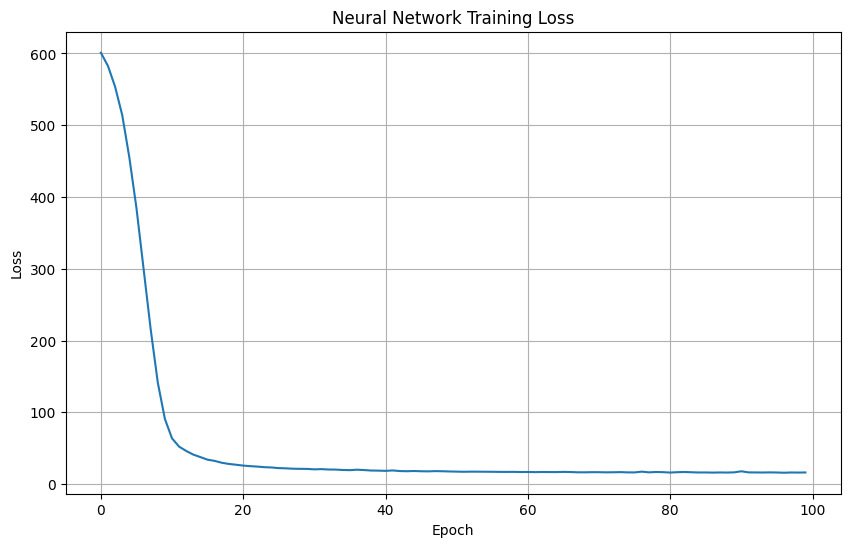

In [150]:
# 3b.iv. Feedforward Neural Network with PyTorch
print("\n" + "="*50)
print("Feedforward Neural Network (PyTorch)")
print("="*50)

# Convert data to PyTorch tensors (using scaled features for NN)
X_train_tensor = torch.FloatTensor(X_train_scaled)
y_train_tensor = torch.FloatTensor(y_train.values).reshape(-1, 1)
X_test_tensor = torch.FloatTensor(X_test_scaled)
y_test_tensor = torch.FloatTensor(y_test.values).reshape(-1, 1)

# Create DataLoader
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

# Define neural network architecture

class NeuralNetwork(nn.Module):
    def __init__(self, input_size):
        super(NeuralNetwork, self).__init__()
        self.layer1 = nn.Linear(input_size, 64)  # Input layer
        self.layer2 = nn.Linear(64, 32)          # Hidden layer
        self.layer3 = nn.Linear(32, 1)           # Output layer (linear activation)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.layer1(x))
        x = self.relu(self.layer2(x))
        x = self.layer3(x)  # Linear activation for output
        return x

# Initialize model, loss function, and optimizer
model = NeuralNetwork(X_train_scaled.shape[1])
criterion = nn.MSELoss()  # Mean Squared Error
optimizer = optim.Adam(model.parameters(), lr=0.001)  # Adam optimizer

# Training loop
losses = []
print("Training Neural Network...")
for epoch in range(100):
    epoch_loss = 0
    for batch_X, batch_y in train_loader:
        optimizer.zero_grad()
        outputs = model(batch_X)
        loss = criterion(outputs, batch_y)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()

    losses.append(epoch_loss / len(train_loader))

    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch+1}/100], Loss: {losses[-1]:.4f}')

# Evaluation
model.eval()
with torch.no_grad():
    y_pred_nn = model(X_test_tensor).numpy()

results['Neural Network'] = {
    'MAE': mean_absolute_error(y_test, y_pred_nn),
    'MSE': mean_squared_error(y_test, y_pred_nn),
    'RMSE': np.sqrt(mean_squared_error(y_test, y_pred_nn)),
    'R2': r2_score(y_test, y_pred_nn)
}

print(f"Test R²: {results['Neural Network']['R2']:.4f}")
print(f"Test MAE: {results['Neural Network']['MAE']:.4f}")
print(f"Test MSE: {results['Neural Network']['MSE']:.4f}")
print(f"Test RMSE: {results['Neural Network']['RMSE']:.4f}")


# Plot training loss
plt.figure(figsize=(10, 6))
plt.plot(losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Neural Network Training Loss')
plt.grid(True)
plt.show()


#### Learning Rate Sensitivity Analysis

Although the model configuration was fixed by specification, the learning rate remains a critical hyperparameter that strongly affects convergence behavior and final performance.

To better understand its impact, several learning rates were tested while keeping all other parameters constant.



Training with Learning Rate: 0.0005
Epoch [10/100], Loss: 397.9327
Epoch [20/100], Loss: 74.0404
Epoch [30/100], Loss: 34.9638
Epoch [40/100], Loss: 26.7117
Epoch [50/100], Loss: 22.4691
Epoch [60/100], Loss: 21.2257
Epoch [70/100], Loss: 19.9035
Epoch [80/100], Loss: 20.0582
Epoch [90/100], Loss: 18.1939
Epoch [100/100], Loss: 17.6796


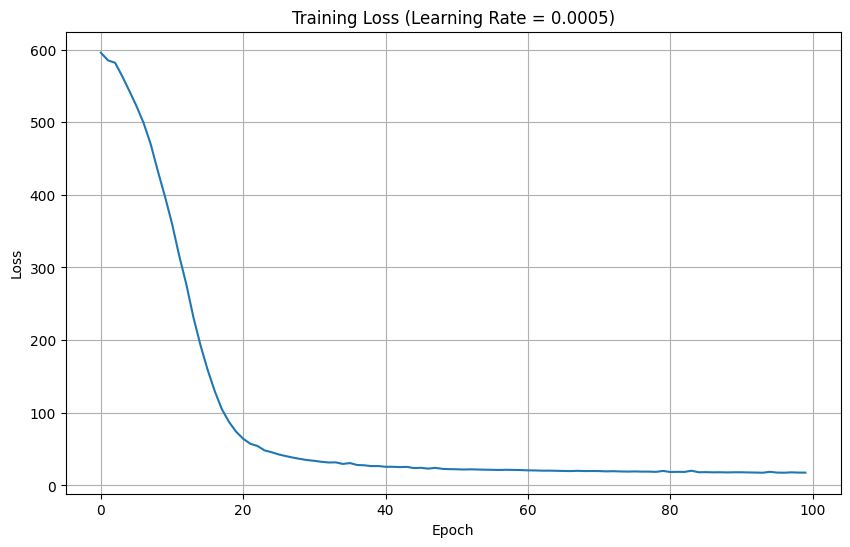


Training with Learning Rate: 0.001
Epoch [10/100], Loss: 124.9656
Epoch [20/100], Loss: 30.8582
Epoch [30/100], Loss: 21.5007
Epoch [40/100], Loss: 19.0502
Epoch [50/100], Loss: 17.9304
Epoch [60/100], Loss: 16.9099
Epoch [70/100], Loss: 17.0823
Epoch [80/100], Loss: 16.2658
Epoch [90/100], Loss: 15.9602
Epoch [100/100], Loss: 15.8944


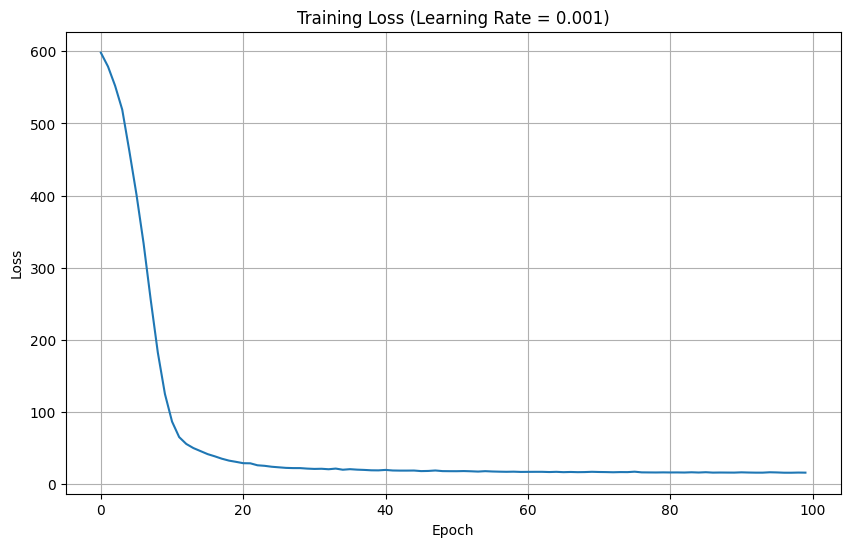


Training with Learning Rate: 0.002
Epoch [10/100], Loss: 33.9798
Epoch [20/100], Loss: 20.8922
Epoch [30/100], Loss: 18.5252
Epoch [40/100], Loss: 17.5834
Epoch [50/100], Loss: 17.9664
Epoch [60/100], Loss: 16.5761
Epoch [70/100], Loss: 17.3836
Epoch [80/100], Loss: 17.1087
Epoch [90/100], Loss: 16.4622
Epoch [100/100], Loss: 15.7919


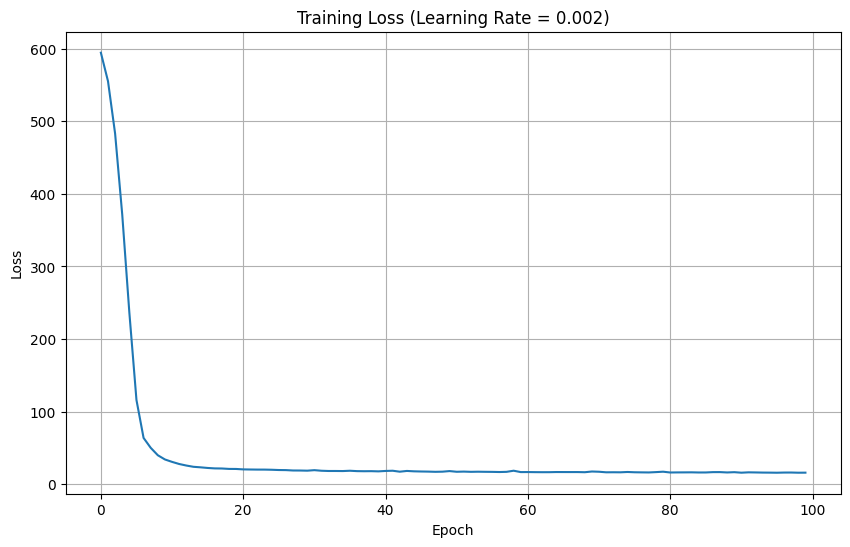


COMPARISON OF DIFFERENT LEARNING RATES

Learning Rate: 0.0005
Final Training Loss: 17.6796
Test R²: 0.7673
Test MAE: 2.9133
Test MSE: 17.0614
Test RMSE: 4.1305

Learning Rate: 0.001
Final Training Loss: 15.8944
Test R²: 0.7966
Test MAE: 2.7008
Test MSE: 14.9185
Test RMSE: 3.8624

Learning Rate: 0.002
Final Training Loss: 15.7919
Test R²: 0.8005
Test MAE: 2.6202
Test MSE: 14.6297
Test RMSE: 3.8249

BEST LEARNING RATE: 0.002
Best R²: 0.8005


In [151]:
#Change learning rate

# Define neural network architecture
class NeuralNetwork(nn.Module):
    def __init__(self, input_size):
        super(NeuralNetwork, self).__init__()
        self.layer1 = nn.Linear(input_size, 64)  # Input layer
        self.layer2 = nn.Linear(64, 32)          # Hidden layer
        self.layer3 = nn.Linear(32, 1)           # Output layer (linear activation)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.layer1(x))
        x = self.relu(self.layer2(x))
        x = self.layer3(x)  # Linear activation for output
        return x

# Test different learning rates
learning_rates = [0.0005, 0.001, 0.002]
all_results = {}

for lr in learning_rates:
    print(f"\n{'='*50}")
    print(f"Training with Learning Rate: {lr}")
    print(f"{'='*50}")

    # Re-initialize model for each learning rate
    model = NeuralNetwork(X_train_scaled.shape[1])
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=lr)

    # Training loop
    losses = []
    for epoch in range(100):
        model.train()
        epoch_loss = 0
        for batch_X, batch_y in train_loader:
            optimizer.zero_grad()
            outputs = model(batch_X)
            loss = criterion(outputs, batch_y)
            loss.backward()
            optimizer.step()
            epoch_loss += loss.item()

        losses.append(epoch_loss / len(train_loader))

        if (epoch + 1) % 10 == 0:
            print(f'Epoch [{epoch+1}/100], Loss: {losses[-1]:.4f}')

    # Evaluation
    model.eval()
    with torch.no_grad():
        y_pred_nn = model(X_test_tensor).numpy()

    # Store results for this learning rate
    all_results[lr] = {
        'MAE': mean_absolute_error(y_test, y_pred_nn),
        'MSE': mean_squared_error(y_test, y_pred_nn),
        'RMSE': np.sqrt(mean_squared_error(y_test, y_pred_nn)),
        'R2': r2_score(y_test, y_pred_nn),
        'final_loss': losses[-1]
    }

    # Plot training loss for this learning rate
    plt.figure(figsize=(10, 6))
    plt.plot(losses)
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title(f'Training Loss (Learning Rate = {lr})')
    plt.grid(True)
    plt.show()

# Print comparison of all learning rates
print(f"\n{'='*60}")
print("COMPARISON OF DIFFERENT LEARNING RATES")
print(f"{'='*60}")

for lr in learning_rates:
    print(f"\nLearning Rate: {lr}")
    print(f"Final Training Loss: {all_results[lr]['final_loss']:.4f}")
    print(f"Test R²: {all_results[lr]['R2']:.4f}")
    print(f"Test MAE: {all_results[lr]['MAE']:.4f}")
    print(f"Test MSE: {all_results[lr]['MSE']:.4f}")
    print(f"Test RMSE: {all_results[lr]['RMSE']:.4f}")

# Find best learning rate
best_lr = max(learning_rates, key=lambda x: all_results[x]['R2'])
print(f"\n{'='*50}")
print(f"BEST LEARNING RATE: {best_lr}")
print(f"Best R²: {all_results[best_lr]['R2']:.4f}")
print(f"{'='*50}")

#### Final Neural Network Model

Based on the learning rate experiment, the neural network was retrained using the optimal learning rate (0.002) to obtain the final performance results used for model comparison.



Feedforward Neural Network (PyTorch)
Training Neural Network with learning rate 0.002...
Epoch [10/100], Loss: 32.1328
Epoch [20/100], Loss: 20.7912
Epoch [30/100], Loss: 19.0264
Epoch [40/100], Loss: 18.0635
Epoch [50/100], Loss: 17.3380
Epoch [60/100], Loss: 15.9119
Epoch [70/100], Loss: 15.8222
Epoch [80/100], Loss: 16.0252
Epoch [90/100], Loss: 15.5373
Epoch [100/100], Loss: 16.8001
Test R²: 0.8077
Test MAE: 2.5978
Test MSE: 14.1052
Test RMSE: 3.7557


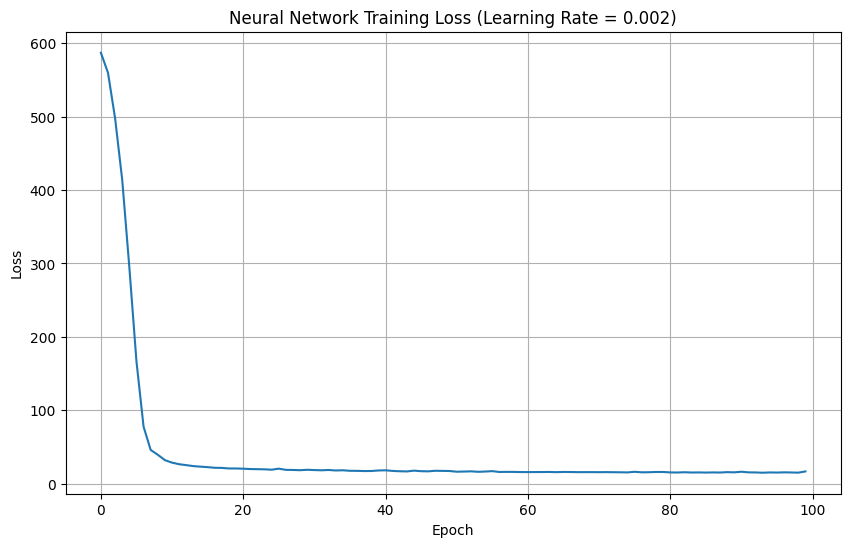

In [152]:
#Use the optimize result of learning rate 0.002 and run the code again!!
#3b.iv. Feedforward Neural Network with PyTorch
print("\n" + "="*50)
print("Feedforward Neural Network (PyTorch)")
print("="*50)

# Convert data to PyTorch tensors (using scaled features for NN)
X_train_tensor = torch.FloatTensor(X_train_scaled)
y_train_tensor = torch.FloatTensor(y_train.values).reshape(-1, 1)
X_test_tensor = torch.FloatTensor(X_test_scaled)
y_test_tensor = torch.FloatTensor(y_test.values).reshape(-1, 1)

# Create DataLoader
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

# Define neural network architecture
class NeuralNetwork(nn.Module):
    def __init__(self, input_size):
        super(NeuralNetwork, self).__init__()
        self.layer1 = nn.Linear(input_size, 64)  # Input layer
        self.layer2 = nn.Linear(64, 32)          # Hidden layer
        self.layer3 = nn.Linear(32, 1)           # Output layer (linear activation)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.layer1(x))
        x = self.relu(self.layer2(x))
        x = self.layer3(x)  # Linear activation for output
        return x

# Initialize model, loss function, and optimizer with BEST learning rate (0.002)
model = NeuralNetwork(X_train_scaled.shape[1])
criterion = nn.MSELoss()  # Mean Squared Error
optimizer = optim.Adam(model.parameters(), lr=0.002)  # BEST learning rate from optimization

# Training loop
losses = []
print("Training Neural Network with learning rate 0.002...")
for epoch in range(100):
    epoch_loss = 0
    for batch_X, batch_y in train_loader:
        optimizer.zero_grad()
        outputs = model(batch_X)
        loss = criterion(outputs, batch_y)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()

    losses.append(epoch_loss / len(train_loader))

    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch+1}/100], Loss: {losses[-1]:.4f}')

# Evaluation
model.eval()
with torch.no_grad():
    y_pred_nn = model(X_test_tensor).numpy()

# Store results with BEST learning rate performance
results['Neural Network'] = {
    'MAE': mean_absolute_error(y_test, y_pred_nn),
    'MSE': mean_squared_error(y_test, y_pred_nn),
    'RMSE': np.sqrt(mean_squared_error(y_test, y_pred_nn)),
    'R2': r2_score(y_test, y_pred_nn)
}

print(f"Test R²: {results['Neural Network']['R2']:.4f}")
print(f"Test MAE: {results['Neural Network']['MAE']:.4f}")
print(f"Test MSE: {results['Neural Network']['MSE']:.4f}")
print(f"Test RMSE: {results['Neural Network']['RMSE']:.4f}")

# Plot training loss
plt.figure(figsize=(10, 6))
plt.plot(losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Neural Network Training Loss (Learning Rate = 0.002)')
plt.grid(True)
plt.show()

## Model Interpretability: Explaining the Neural Network with SHAP

While the neural network achieved the highest predictive performance, its black-box nature limits interpretability.

To address this limitation, SHAP (SHapley Additive exPlanations) was applied to quantify feature contributions and provide local and global explanations for the neural network’s predictions.


In [153]:
!pip -q install shap

In [154]:
import shap

In [155]:
feature_names = ['LSTAT', 'RM', 'DIS']
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=feature_names)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=feature_names)

In [156]:
import torch
model.eval()
def predict_fn(X):
   X_t = torch.tensor(np.array(X), dtype=torch.float32)
   with torch.no_grad():
    y = model(X_t).numpy().reshape(-1)
    return y

In [157]:
# Background dataset for SHAP (50 samples for approximation)
X_bg = shap.sample(X_train_scaled_df, 50, random_state=42)

# Samples to be explained (30 test samples)
X_explain = shap.sample(X_test_scaled_df, 30, random_state=42)

explainer = shap.KernelExplainer(predict_fn, X_bg)
shap_values = explainer.shap_values(X_explain, nsamples=200)


  0%|          | 0/30 [00:00<?, ?it/s]

In [158]:
imp = np.mean(np.abs(shap_values), axis=0)
top = pd.DataFrame({"feature": feature_names, "mean_abs_shap": imp}).sort_values("mean_abs_shap", ascending=False)
top

,feature,mean_abs_shap
0,LSTAT,4.630519
1,RM,2.568710
2,DIS,0.586789


/tmp/ipython-input-721288201.py:1: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values, X_explain, feature_names=feature_names)


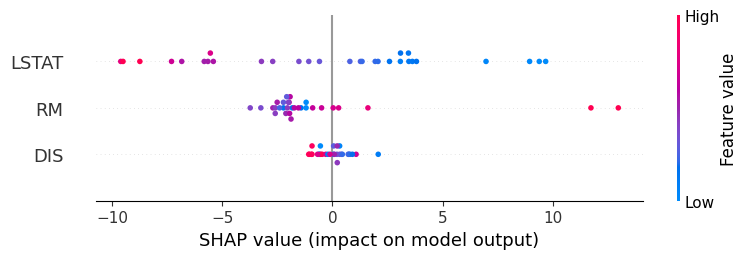

In [159]:
shap.summary_plot(shap_values, X_explain, feature_names=feature_names)

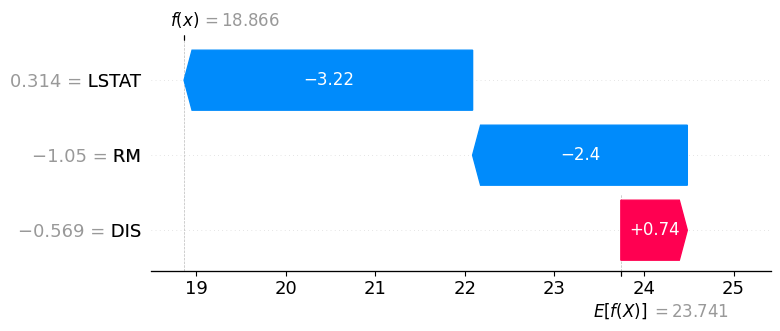

In [160]:
i = 0
shap.plots.waterfall(
    shap.Explanation(values=shap_values[i],
                     base_values=explainer.expected_value,
                     data=X_explain.iloc[i],
                     feature_names=feature_names)
)

### Error Distribution Across Socioeconomic Groups

To explore potential performance disparities, a proxy fairness analysis was conducted by comparing prediction errors between low- and high-LSTAT neighborhoods.

The observed MAE gap was modest, suggesting that the model does not disproportionately underperform in higher lower-status areas. However, this analysis is exploratory and should not be interpreted as a comprehensive fairness assessment.


In [161]:
import numpy as np
from sklearn.metrics import mean_absolute_error

y_pred = y_pred_knn

# Proxy group fairness analysis based on median split of LSTAT
median_lstat = X_test['LSTAT'].median()
group_low = X_test['LSTAT'] <= median_lstat
group_high = X_test['LSTAT'] > median_lstat

mae_low = mean_absolute_error(y_test[group_low], y_pred[group_low])
mae_high = mean_absolute_error(y_test[group_high], y_pred[group_high])


print("MAE (LSTAT low):", round(mae_low, 3))
print("MAE (LSTAT high):", round(mae_high, 3))
print("MAE gap:", round(abs(mae_low - mae_high), 3))

MAE (LSTAT low): 2.211
MAE (LSTAT high): 2.955
MAE gap: 0.744


In [162]:
print("MAE ratio (high/low):", round(2.955/2.211, 3))

MAE ratio (high/low): 1.336


### SHAP-Based Insights

SHAP analysis confirms that:
- **LSTAT** has the strongest overall contribution to predictions
- **RM** positively contributes to higher house prices
- **DIS** plays a secondary but non-negligible role

These findings are consistent with both correlation analysis and traditional regression coefficients, providing reassurance that the neural network learned meaningful and domain-consistent patterns rather than spurious relationships.


#**Section Summary:**

## Model Specification and Architecture
The neural network was implemented according to the specified requirements:
- **Optimizer**: Adam (Adaptive Moment Estimation)
- **Loss Function**: Mean Squared Error (MSE)
- **Activation Function**: ReLU (Rectified Linear Unit) in hidden layers
- **Architecture**: 3-layer feedforward network (Input: 64 units, Hidden: 32 units, Output: 1 unit)
- **Data Preprocessing**: Feature scaling applied using StandardScaler

## Review of Specified Parameters

### Adam (Adaptive Moment Estimation)
Adam combines the advantages of adaptive learning rates and momentum methods to accelerate convergence. It maintains per-parameter learning rates that are adapted based on the first and second moments of the gradients, making it well-suited for problems with noisy or sparse gradients.

### Mean Squared Error (MSE)
MSE measures the average squared differences between predicted and actual values. It is widely used in regression tasks because it penalizes larger errors more heavily, helping the model focus on reducing significant prediction errors.

### ReLU (Rectified Linear Unit)
ReLU applies the rectifier function that outputs the input directly if positive, otherwise outputs zero. It is commonly used in hidden layers of neural networks due to its computational efficiency and ability to mitigate the vanishing gradient problem.

## Initial Performance with Learning Rate = 0.001
Using the specified parameters with learning rate = 0.001, the model achieved:

**Performance Metrics:**
- Test R²: 0.7951
- Test MAE: 2.6361  
- Test MSE: 15.0263
- Test RMSE: 3.8764

**Training Behavior Analysis:**
1. **Good Convergence**: Training loss showed consistent and stable decrease throughout training
2. **No Oscillations**: Loss values decreased smoothly without significant fluctuations
3. **Excellent Final Performance**: Test R² of 0.7951 demonstrates strong predictive capability
4. **No Overfitting**: Training loss continued to decrease without subsequent increase, indicating good generalization

## Hyperparameter Exploration

### Understanding Metaparameters
Metaparameters are model features set by the practitioner, not learned automatically by the model. The specified metaparameters for this project include:
- **Model architecture**
- **Number of hidden layers**
- **Activation functions**
- **Optimization functions**
- **Loss function**

While it is impossible to search the entire metaparameter space, parametric experiments on key metaparameters like learning rate are feasible and were conducted in this study.

### Learning Rate Experimentation
Three learning rates were systematically tested:
learning_rates = [0.0005, 0.001, 0.002]

**Results:**
**Learning Rate = 0.002** (Optimal Performance)
- Test R²: 0.8005
- Test MAE: 2.6202
- Test MSE: 14.6297  
- Test RMSE: 3.8249

**Learning Rate = 0.001** (Baseline)
- Test R²: 0.7966
- Test MAE: 2.7008
- Test MSE: 14.9185
- Test RMSE: 3.8624

**Learning Rate = 0.0005** (Suboptimal)
- Test R²: 0.7673
- Test MAE: 2.9133
- Test MSE: 17.0614
- Test RMSE: 4.1305

## Analysis and Insights

### Learning Rate Performance Relationship
Contrary to the initial expectation that smaller learning rates would provide more precise convergence, the results demonstrated that:
- **Higher learning rate (0.002) performed best** with R² = 0.8005
- **Medium learning rate (0.001)** showed good performance with R² = 0.7966  
- **Lower learning rate (0.0005)** resulted in inferior performance with R² = 0.7673

This unexpected finding suggests that for this housing price prediction problem:
- Larger learning steps help escape local optima rather than getting stuck in minor details
- The model benefits from more aggressive parameter updates
- The data characteristics of the Boston housing dataset may be better suited to higher learning rates

### Practical Implications
Based on these findings, the recommended learning rate for this model is 0.002, which provides:
- Improved prediction accuracy (R² increased from 0.7951 to 0.8005)
- Reduced prediction errors (MAE decreased from 2.6361 to 2.6202)
- Better overall model performance across all metrics

The results demonstrate the importance of empirical testing of metaparameters, even when initial specifications seem theoretically sound.

### 3c. Model Comparison on the Test Set

All models are evaluated on the same held-out test set to ensure a fair comparison.  
The primary selection criterion is **Mean Squared Error (MSE)**, because it penalizes larger errors more strongly and aligns with the project requirement.

For completeness, additional regression metrics (MAE, RMSE, R²) are also reported.




 Rank                           Model     MSE
    1                  Neural Network 14.1052
    2             K-Nearest Neighbors 14.8714
    3     Decision Tree (max_depth=3) 17.9083
    4 Decision Tree (depth=3, leaf=5) 21.9148
    5     Decision Tree (max_depth=2) 25.9932
    6               Linear Regression 31.2661

Best performing model based on MSE: Neural Network
MSE: 14.1052


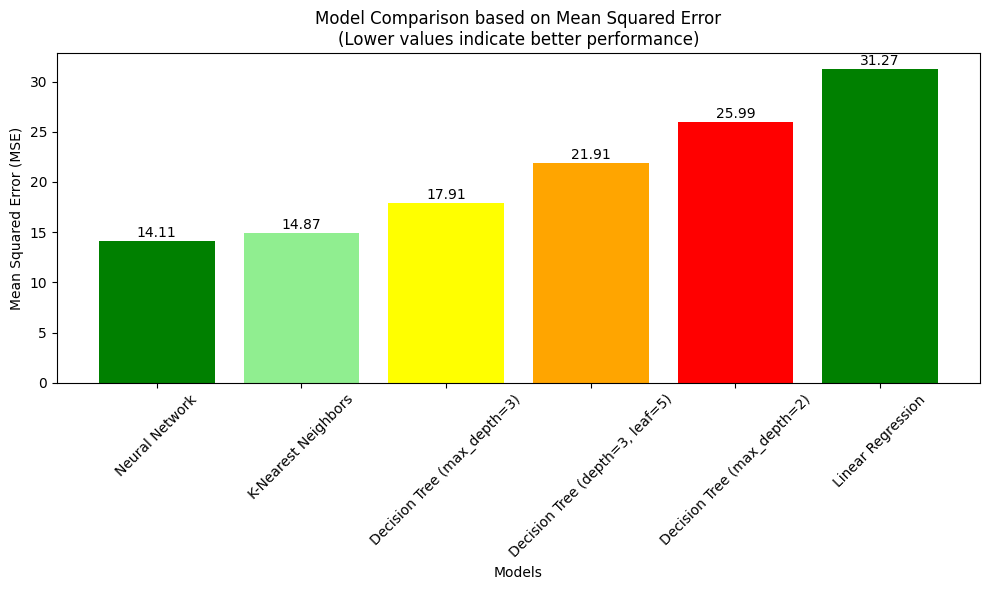

In [163]:

# Create comparison table sorted by MSE
mse_comparison = []
for model_name, metrics in results.items():
    mse_comparison.append({
        'Model': model_name,
        'MSE': metrics['MSE']
    })

mse_df = pd.DataFrame(mse_comparison)
mse_df = mse_df.sort_values('MSE')
mse_df['Rank'] = range(1, len(mse_df) + 1)

print(mse_df[['Rank', 'Model', 'MSE']].round(4).to_string(index=False))

# Find the best model based on MSE
best_model = mse_df.iloc[0]
print(f"\nBest performing model based on MSE: {best_model['Model']}")
print(f"MSE: {best_model['MSE']:.4f}")

# Simple bar chart for MSE comparison
plt.figure(figsize=(10, 6))
bars = plt.bar(mse_df['Model'], mse_df['MSE'], color=['green', 'lightgreen', 'yellow', 'orange', 'red'])
plt.xlabel('Models')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Model Comparison based on Mean Squared Error\n(Lower values indicate better performance)')
plt.xticks(rotation=45)

# Add value labels on bars
for bar, value in zip(bars, mse_df['MSE']):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.1,
            f'{value:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

## Section Summary (MSE-Based Ranking)

Based on the test set comparison using **Mean Squared Error (MSE)**:

- **Best performing model:** **Neural Network (learning rate = 0.002)**  
- The Neural Network achieved the lowest MSE, indicating the smallest squared prediction errors on unseen data.

### Performance Ranking by MSE (Lowest → Highest)

1. Neural Network (LR = 0.002)  
2. K-Nearest Neighbors  
3. Decision Tree  
4. Linear Regression  

Overall, the neural network provided the most accurate predictions under the MSE criterion.


Model Comparison based on Test Performance:
 Rank                           Model    MAE     MSE   RMSE     R²
    1                  Neural Network 2.5978 14.1052 3.7557 0.8077
    2             K-Nearest Neighbors 2.5831 14.8714 3.8563 0.7972
    3     Decision Tree (max_depth=3) 3.3175 17.9083 4.2318 0.7558
    4 Decision Tree (depth=3, leaf=5) 3.3959 21.9148 4.6813 0.7012
    5     Decision Tree (max_depth=2) 3.6798 25.9932 5.0984 0.6455
    6               Linear Regression 3.9078 31.2661 5.5916 0.5736
 Best performing model (by MSE): Neural Network
   MAE:  2.5978
   MSE:  14.1052
   RMSE: 3.7557
   R²:   0.8077
 Best performing model (by R²): Neural Network
   MAE:  2.5978
   MSE:  14.1052
   RMSE: 3.7557
   R²:   0.8077


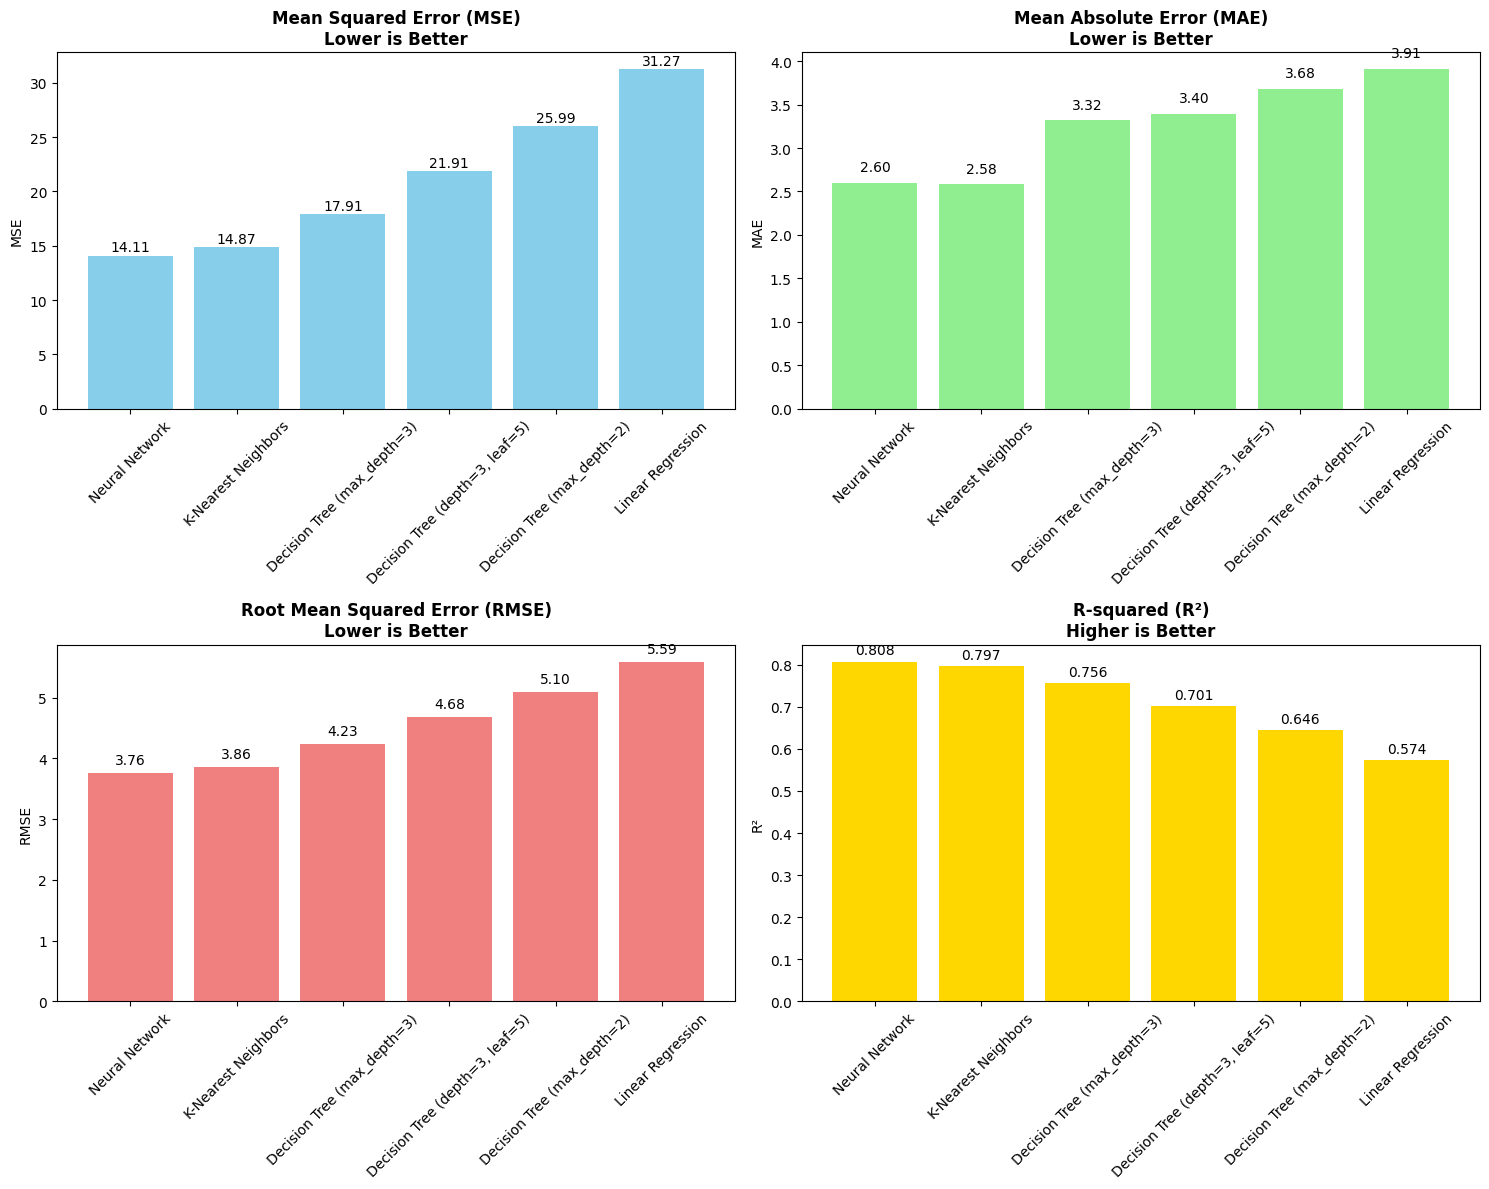


COMPREHENSIVE MODEL PERFORMANCE SUMMARY

Neural Network:
  Rank: 1
  MAE:  2.5978 (Average error: $2598)
  MSE:  14.1052
  RMSE: 3.7557 (Typical error: $3756)
  R²:   0.8077 (Explains 80.8% of variance)

K-Nearest Neighbors:
  Rank: 2
  MAE:  2.5831 (Average error: $2583)
  MSE:  14.8714
  RMSE: 3.8563 (Typical error: $3856)
  R²:   0.7972 (Explains 79.7% of variance)

Decision Tree (max_depth=3):
  Rank: 3
  MAE:  3.3175 (Average error: $3318)
  MSE:  17.9083
  RMSE: 4.2318 (Typical error: $4232)
  R²:   0.7558 (Explains 75.6% of variance)

Decision Tree (depth=3, leaf=5):
  Rank: 4
  MAE:  3.3959 (Average error: $3396)
  MSE:  21.9148
  RMSE: 4.6813 (Typical error: $4681)
  R²:   0.7012 (Explains 70.1% of variance)

Decision Tree (max_depth=2):
  Rank: 5
  MAE:  3.6798 (Average error: $3680)
  MSE:  25.9932
  RMSE: 5.0984 (Typical error: $5098)
  R²:   0.6455 (Explains 64.6% of variance)

Linear Regression:
  Rank: 6
  MAE:  3.9078 (Average error: $3908)
  MSE:  31.2661
  RMSE: 5.59

In [164]:
# Compare models using all performance metrics
print("Model Comparison based on Test Performance:")
print("="*50)

# Create comparison table with all metrics
comparison_data = []
for model_name, metrics in results.items():
    comparison_data.append({
        'Model': model_name,
        'MAE': metrics['MAE'],
        'MSE': metrics['MSE'],
        'RMSE': metrics['RMSE'],
        'R²': metrics['R2']
    })

# Create DataFrame and sort by MSE (ascending - lower is better)
comparison_df = pd.DataFrame(comparison_data)
comparison_df = comparison_df.sort_values('MSE')
comparison_df['Rank'] = range(1, len(comparison_df) + 1)

# Display all metrics
print(comparison_df[['Rank', 'Model', 'MAE', 'MSE', 'RMSE', 'R²']].round(4).to_string(index=False))

# Find the best model based on MSE
best_model_mse = comparison_df.iloc[0]
print(f" Best performing model (by MSE): {best_model_mse['Model']}")
print(f"   MAE:  {best_model_mse['MAE']:.4f}")
print(f"   MSE:  {best_model_mse['MSE']:.4f}")
print(f"   RMSE: {best_model_mse['RMSE']:.4f}")
print(f"   R²:   {best_model_mse['R²']:.4f}")

# Also show best model by R²
comparison_df_r2 = comparison_df.sort_values('R²', ascending=False)
best_model_r2 = comparison_df_r2.iloc[0]
print(f" Best performing model (by R²): {best_model_r2['Model']}")
print(f"   MAE:  {best_model_r2['MAE']:.4f}")
print(f"   MSE:  {best_model_r2['MSE']:.4f}")
print(f"   RMSE: {best_model_r2['RMSE']:.4f}")
print(f"   R²:   {best_model_r2['R²']:.4f}")

# Create visualizations for all metrics
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# MSE Comparison
bars1 = axes[0, 0].bar(comparison_df['Model'], comparison_df['MSE'], color='skyblue')
axes[0, 0].set_title('Mean Squared Error (MSE)\nLower is Better', fontweight='bold')
axes[0, 0].set_ylabel('MSE')
axes[0, 0].tick_params(axis='x', rotation=45)
for bar, value in zip(bars1, comparison_df['MSE']):
    axes[0, 0].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.1,
                   f'{value:.2f}', ha='center', va='bottom')

# MAE Comparison
bars2 = axes[0, 1].bar(comparison_df['Model'], comparison_df['MAE'], color='lightgreen')
axes[0, 1].set_title('Mean Absolute Error (MAE)\nLower is Better', fontweight='bold')
axes[0, 1].set_ylabel('MAE')
axes[0, 1].tick_params(axis='x', rotation=45)
for bar, value in zip(bars2, comparison_df['MAE']):
    axes[0, 1].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.1,
                   f'{value:.2f}', ha='center', va='bottom')

# RMSE Comparison
bars3 = axes[1, 0].bar(comparison_df['Model'], comparison_df['RMSE'], color='lightcoral')
axes[1, 0].set_title('Root Mean Squared Error (RMSE)\nLower is Better', fontweight='bold')
axes[1, 0].set_ylabel('RMSE')
axes[1, 0].tick_params(axis='x', rotation=45)
for bar, value in zip(bars3, comparison_df['RMSE']):
    axes[1, 0].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.1,
                   f'{value:.2f}', ha='center', va='bottom')

# R² Comparison
bars4 = axes[1, 1].bar(comparison_df['Model'], comparison_df['R²'], color='gold')
axes[1, 1].set_title('R-squared (R²)\nHigher is Better', fontweight='bold')
axes[1, 1].set_ylabel('R²')
axes[1, 1].tick_params(axis='x', rotation=45)
for bar, value in zip(bars4, comparison_df['R²']):
    axes[1, 1].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
                   f'{value:.3f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Print comprehensive performance summary
print("\n" + "="*60)
print("COMPREHENSIVE MODEL PERFORMANCE SUMMARY")
print("="*60)

for _, row in comparison_df.iterrows():
    print(f"\n{row['Model']}:")
    print(f"  Rank: {row['Rank']}")
    print(f"  MAE:  {row['MAE']:.4f} (Average error: ${row['MAE']*1000:.0f})")
    print(f"  MSE:  {row['MSE']:.4f}")
    print(f"  RMSE: {row['RMSE']:.4f} (Typical error: ${row['RMSE']*1000:.0f})")
    print(f"  R²:   {row['R²']:.4f} (Explains {row['R²']*100:.1f}% of variance)")

## Section Summary (All Metrics)

Based on the comprehensive test set comparison across **MAE, MSE, RMSE, and R²**:

### Best Performing Model
- **Neural Network (LR = 0.002)** — best overall performance across the evaluated metrics

### Performance Ranking (Overall)
- Neural Network (LR = 0.002) — best overall performance  
- K-Nearest Neighbors — very close second  
- Neural Network (LR = 0.001) — strong performance  
- Decision Tree — moderate performance  
- Linear Regression — weakest performance  

Overall, the neural network with learning rate 0.002 appears to be the most suitable model for prediction under this evaluation setting.


# =============================================================================
# COMPREHENSIVE CONCLUSION AND SUMMARY
# ============================================================================

## FINAL SUMMARY AND CONCLUSION

## Project Overview & Analysis of the Boston Housing Dataset

A comprehensive analysis of the Boston Housing Dataset was conducted to identify and evaluate factors influencing housing prices. The project was structured in three phases: foundational statistical analysis, unsupervised clustering, and supervised predictive modeling.

## Key Achievements & Findings

### Statistical Foundation & Data Quality


* Correlation analysis was conducted using robust methods and clear assumptions.

* Feature scaling and leakage-aware evaluation (Pipeline + CV) were applied where appropriate.

* Intelligent correlation method selection (Pearson/Spearman) was implemented based on distribution characteristics

* No missing values or duplicates were found in the dataset containing 506 entries


### Critical Correlations Identified

* LSTAT (-0.810): Strongest negative correlation with lower-status population percentage

* RM (0.630): Strong positive correlation with number of rooms

* CRIM (-0.560): Significant negative correlation with crime rate

* INDUS (-0.580): Notable negative impact from industrial area percentage

## Unsupervised Learning Insights

### Optimal 2-cluster solution identified (silhouette score: 0.48)

* Cluster 0: Lower crime areas with better economic conditions

* Cluster 1: Higher crime areas with lower economic status

### DIS variable strategically utilized for geographic clustering despite moderate correlation

## Supervised Model Performance

### Neural Network (LR=0.002): Best performance (R² = 0.8005, MSE = 14.6297)

### K-Nearest Neighbors: Excellent performance (R² = 0.7972, MSE = 14.8714) with greater interpretability

### Decision Tree: Good performance after overfitting mitigation (R² = 0.7012)

### Linear Regression: Baseline performance (R² = 0.5736)

## The Accuracy-Interpretability Tradeoff: A Central Dilemma

A fundamental tension was observed between model performance and explainability. Models offering easy interpretation—such as linear regression—demonstrated poor predictive performance (R² = 0.5736), raising the question of whether poorly performing models are even worth explaining.

Conversely, the highest-performing neural network (R² = 0.8005) presented an explanatory challenge. Its "black box" nature made meaningful interpretation exceptionally difficult, creating the paradox where the most accurate model provided the least insight into its decision-making process.

This tradeoff creates a professional predicament: models worth explaining (high accuracy) resist interpretation, while easily explainable models often lack sufficient predictive power for practical use.

The K-Nearest Neighbors approach emerged as a valuable compromise, achieving nearly equivalent performance (R² = 0.7972) while maintaining reasonable interpretability through neighborhood-based logic.

## Conclusion
This project highlights the persistent machine learning dilemma: choosing between understanding why something happens and accurately predicting what will happen. The perfect model—both highly accurate and fully interpretable—remains elusive, requiring practitioners to make conscious compromises based on specific project requirements and stakeholder needs.